<hr>
<h1 style="color:red; text-align:center;">SAÉ401 : Expliquer ou prédire une variable quantitative à l'aide de plusieurs facteurs</h1>
<hr>

<h2><u>INTRODUCTION</u></h2>

<p>Dans le cadre de cette SAE, nous travaillons avec une base de données issue de <strong>Data Gouv</strong>, développée dans le cadre d’un défi lié au <strong>Diagnostic de Performance Énergétique (DPE)</strong>, ce défi provient de <b>Enedis</b>. Ce dataset contient une multitude de variables décrivant les performances énergétiques des bâtiments ainsi que des données relatives aux consommations électriques, aux caractéristiques des logements et à leur impact climatique. Ces informations sont essentielles pour analyser et améliorer la transition énergétique.</p>

<p>Après avoir nettoyé notre Dataset, il devient évident que la grande dimensionnalité des données peut rendre l’analyse complexe et peu intuitive. Nous allons donc appliquer des méthodes d’<strong>Analyse en Composantes Principales (ACP)</strong>, une technique statistique qui joue un rôle crucial pour :</p>
<ul>
    <li><strong>Détecter les liaisons et corrélations</strong> existantes entre les variables, afin d’identifier des groupes de variables liées.</li>
    <li><strong>Regrouper les variables fortement corrélées</strong> en nouvelles variables synthétiques, permettant ainsi de réduire la redondance des données.</li>
    <li><strong>Conserver les dimensions les plus significatives</strong>, tout en simplifiant l’interprétation des résultats et en optimisant les calculs futurs.</li>
</ul>

<p>Ce processus nous permettra de projeter les données dans un espace réduit, où les axes principaux de variation seront identifiés et interprétés. Ces axes offriront une vision globale des interactions entre les variables, tout en facilitant la mise en place d’analyses approfondies telles que la validation des estimations fournies par les DPE, l’impact des rénovations énergétiques sur les consommations électriques et la création de modèles prédictifs adaptés.</p>


<h2>1) Import des librairies</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>2) Préparation et exploration des données</h2>

<h3 style="color:blue">2.1 ) Chargement du Dataset</h3> 

In [2]:
df = pd.read_csv("DATA.csv", sep = ",")
df.head()

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\138435286.py:1: DtypeWarning: Columns (35,51,112,226,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DATA.csv", sep = ",")


,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Type_générateur_froid,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
0,2463E4534696Y,2024-12-22,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,chauffage au bois,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
1,2456E4535037U,2024-12-22,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,chauffe-eau thermodynamique,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
2,2462E4538696T,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,NaN,2034-12-21,2.4,2462E4538421E,0.0,...,NaN,NaN,NaN,panneaux solaires thermiques,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
3,2433E4552306C,2024-12-23,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
4,2447E4544281Z,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,NaN,2034-12-21,2.4,NaN,NaN,...,PAC air/air installée entre 2008 et 2014,60.0,Électricité,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,9113.6,21.6,18.0


<h3 style="color : blue":>2.2) Exploration des données</h3>

<h4 style="color : green">2.2.1) Dimension du Dataset</h4>

In [3]:
df.shape

(8718, 242)

<hr>
<p><u>Voici la dimension de notre Dataset : </u></p>
<ul>
    <li><code>8718 lignes</code></li>
    <li><code>242 colonnes</code></li>
</ul>
<hr>
<p>Dans notre Dataset on va retrouver 8718 lignes et 242 colonnes, ici les lignes correspondent à des individus et plus précisément à des logements, quant à elles les colonnes vont correspondre aux différents caracteristiques des logements.</p>

<h4 style="color:green">2.2.1) Variables du Dataset</h4>

<p>Nous allons maitenant nous intéresser aux variables de notre Dataset. Pour cela, nous initialisons deux variables permettant de stocker les :</p>
<ul>
    <li><code>variables quantitatives</code></li>
    <li><code>variables qualitatives</code></li>
</ul>

In [4]:
qualitative = df.select_dtypes(exclude=['int64','float64'])
quantitative = df.select_dtypes(include=['int64','float64'])

In [5]:
qualitative.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'N°_DPE_immeuble_associé',
       'Méthode_application_DPE', 'N°_immatriculation_copropriété',
       'Etiquette_GES', 'Etiquette_DPE', 'Type_bâtiment',
       'Type_installation_chauffage', 'Type_installation_ECS_(général)',
       'Période_construction', 'Classe_inertie_bâtiment', 'Typologie_logement',
       'Position_logement_dans_immeuble', 'Classe_altitude',
       'Zone_climatique_', 'Adresse_brute', 'Nom__commune_(BAN)',
       'Code_INSEE_(BAN)', 'N°_voie_(BAN)', 'Identifiant__BAN',
       'Adresse_(BAN)', 'Nom__rue_(BAN)', 'Nom_résidence',
       'Complément_d'adresse_bâtiment', 'Cage_d'escalier',
       'Complément_d'adresse_logement', 'Statut_géocodage',
       'N°_département_(BAN)', 'Type_énergie_n°1', 'Type_énergie_n°2',
       'Type_énergie_n°3', 'Indicateur_confort_été',
       'Qualité_isolation_enveloppe

<p>Ici nous avons toutes les variables qualitative de notre Dataset, nous en avons 154.</p>


In [6]:
quantitative.columns

Index(['Version_DPE', 'Appartement_non_visité_(0/1)',
       'Invariant_fiscal_logement', 'N°_RPLS_logement', 'Année_construction',
       'Hauteur_sous-plafond', 'Nombre_appartement', 'Nombre_niveau_immeuble',
       'Nombre_niveau_logement', 'Surface_habitable_immeuble',
       ...
       'Surface_ventilée', 'Ventilation_postérieure_2012_(0/1)',
       'Conso_refroidissement_annuel',
       'Conso_refroidissement_dépensier_annuel', 'Surface_climatisée',
       'Electricité_PV_autoconsommée', 'Présence_production_PV_(0/1)',
       'Production_électricité_PV_(kWhep/an)',
       'Surface_totale_capteurs_photovoltaïque', 'Nombre_module'],
      dtype='object', length=154)

<p>Ici nous avons les variables quantitatives, nous en avons 88.</p>
<hr>
<p>Pour les variables quantitatives nous pouvons aller plus loin en affichant les différents statistiques descriptives de ces variables.</p>

In [7]:
quantitative.describe()

,Version_DPE,Appartement_non_visité_(0/1),Invariant_fiscal_logement,N°_RPLS_logement,Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,...,Surface_ventilée,Ventilation_postérieure_2012_(0/1),Conso_refroidissement_annuel,Conso_refroidissement_dépensier_annuel,Surface_climatisée,Electricité_PV_autoconsommée,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
count,8.718000e+03,2047.000000,0.0,4.200000e+01,3968.000000,8718.000000,5458.000000,2297.000000,8458.000000,3495.000000,...,114.000000,114.000000,699.000000,699.000000,699.000000,0.0,114.000000,8718.000000,25.000000,18.000000
mean,2.400000e+00,0.766976,NaN,1.884185e+07,1970.808468,2.582186,21.607365,5.138006,1.324308,3157.566180,...,189.808772,0.570175,153.973391,408.028326,72.506152,NaN,0.219298,14.046169,14.220000,9.833333
std,1.150257e-13,0.422861,NaN,9.520288e+06,38.432864,2.934410,39.822972,2.655221,0.747502,6136.264916,...,381.680040,0.497237,286.238657,801.751542,103.784485,NaN,0.415598,310.869579,9.656388,5.327509
min,2.400000e+00,0.000000,NaN,1.197048e+07,1600.000000,1.700000,1.000000,1.000000,1.000000,1.000000,...,12.200000,0.000000,2.500000,12.500000,6.300000,NaN,0.000000,0.000000,1.200000,1.000000
25%,2.400000e+00,1.000000,NaN,1.197295e+07,1954.000000,2.500000,1.000000,3.000000,1.000000,906.800000,...,60.250000,0.000000,41.850000,120.400000,32.550000,NaN,0.000000,0.000000,9.600000,7.250000
50%,2.400000e+00,1.000000,NaN,1.692685e+07,1973.000000,2.500000,1.000000,5.000000,1.000000,1991.000000,...,67.100000,1.000000,85.700000,233.100000,54.300000,NaN,0.000000,0.000000,12.000000,10.000000
75%,2.400000e+00,1.000000,NaN,2.069442e+07,1998.000000,2.500000,29.000000,5.000000,1.000000,3391.000000,...,109.075000,1.000000,166.850000,426.150000,83.650000,NaN,0.000000,0.000000,18.000000,13.500000
max,2.400000e+00,1.000000,NaN,5.229907e+07,2024.000000,276.000000,1490.000000,13.000000,17.000000,148647.000000,...,2727.000000,1.000000,3919.600000,11115.300000,2102.000000,NaN,1.000000,10112.600000,40.000000,20.000000


<p><u>Les différentes statistiques affichées sont:</u></p>
<ul>
    <li>le nombre de cellules non vides</li>
    <li>la valeur moyenne</li>
    <li>l'ecart type</li>
    <li>la valeur minimum</li>
    <li>le quantile à 25%</li>
    <li>le quantile à 50% (valeur médiane)</li>
    <li>le quantile à 75%</li>
    <li>la valeur maximale</li>
</ul>
<p><u>Avec cette description des variables quantitatives ont peut observer plusieurs choses:</u></p>
<ol>
    <li>Le nombre de cellules remplies pour chacune des variables n'est pas égale au nombre de ligne, ce qui signifie qu'il y a un nombre important de valeur manquantes ( <code>NaN</code> ).</li><br>
    <li>On constate aussi que certaines colonnes ont un <code>count</code> à 0, autrement toutes les celulles de ces colonnes sont vides, elles peuvent donc être supprimées.</li><br>
    <li>La variable version DPE à un <code>min</code> à 2.4 et un <code>max</code> à 2.4, autrement dit la variance est égale à 0, cette variable doit alors être supprimée car elle nous poserait problème pour la suite de notre démarche </li>
</ol>

<h4 style="color:green">2.2.2) Cellules vides dans notre Dataset </h4>

<p>Afin de prendre connaissance des <code>NaN</code> dans notre Dataset nous utilisons la fonction <code>isna().sum()</code> permettant d'afficher la somme des valeurs manquantes pour chaque variables.</p>

In [8]:
df.isna().sum()

N°DPE                                                     0
Date_réception_DPE                                        0
Date_établissement_DPE                                    0
Date_visite_diagnostiqueur                                0
Modèle_DPE                                                0
                                                       ... 
Système_production_électricité_origine_renouvelable    8604
Présence_production_PV_(0/1)                           8604
Production_électricité_PV_(kWhep/an)                      0
Surface_totale_capteurs_photovoltaïque                 8693
Nombre_module                                          8700
Length: 242, dtype: int64

In [9]:
len(df.columns[df.isna().sum()>8000])

59

<p>On constate qu'il a 59 variables avec plus de 8000 cellules vides sur 8718, soit 59 variables avec 91% de cellules vides.</p>
<hr>
<p>Dans cette partie nous avons fait une simple exploration de notre Dataset. Celui-ci nous à permis de savoir quel sera le traitement de données que nous aurons besoin de réaliser avant même de commencer à aller plus loin dans notre étude.</p>
<p><u>Concrètement dans la prochaine partie du nettoyage du Dataset il nous faudra :</u></p>
<ul>
    <li>Supprimer les colonnes comportant trop de <code>NaN</code> à partir d'un certains seuil que l'on fixera.</li>
    <li>Supprimer les variables avec une variance de 0, afin d'éviter tout problème pour les futur étapes de notre étude.</li>
    <li>À partir des variables restantes, remplir les cellules vides avec la valeur médiane ou moyenne en fonction d'un certain seuil que l'on fixera.</li>
</ul>
<hr>

<h3 style="color : blue":>2.3) Nettoyage de notre Dataset</h3>

<hr>
<p><u>Notre exploration du Dataset nous a permis de savoir quel traitement nous devions appliquer aux données de notre Dataset, notamment :</u></p>
<ul>
    <li>La suppression des colonnes comportant trop de <code>NaN</code> à partir d'un certain seuil</li>
    <li>La suppression des variables avec une variance égale à 0</li>
    <li>Le remplissage des cellules vides pour les variables restantes à partir de la valeur moyenne ou médiane en fonction de l'écart type</li>
</ul>
<hr>

<h4 style="color:green">2.3.1) Suppression des doublons & variance nulle</h4>

<p>Avant de commerncer la suppression et le remplissage de nos variables nous allons dans un premier temps supprimer tous les doublons de notre Dataset.</p>

In [10]:
df = df.drop_duplicates(subset=df.columns[1:], keep='first')

In [11]:
df.shape

(8702, 242)

<p>Pour supprimer supprimer ces doublons nous utilisons un <code>drop_duplicates</code> à partir des la première colonne exclu étant donné que chaque identifiant pour chaque logement est unique</p>

In [12]:
df = df.drop(columns="Version_DPE",axis=1)

<p>On supprime la colonne <code>Version_DPE</code> étant donné que sa variance est égale à 0. La suppression de cette colonne est primordiale pour continuer notre étude étant donné que cela pourrait faussé notre <code>matrice de corrélation</code>.</p>

<h4 style="color:green">2.3.2) Suppression des variables avec trop de NaN (80%) </h4>

In [13]:
nan_column = df.columns[df.isna().mean() > 0.8]

In [14]:
df = df.drop(nan_column, axis=1)

In [15]:
df.shape

(8702, 175)

<p>Àpres avoir supprimé les colonnes avec plus de 80% de <code>NaN</code> nous nous retrouvons avec <b>175 variables</b>, soit <b>66 variables supprimées</b>.</p>

<h4 style="color:green">2.3.3) Remplissage des NaN</h4>

<p>Pour continuer à travailler avec notre Dataset il est obligatoire de remplacer ces valeurs vides <code>( NaN )</code> par des <b>valeurs moyennes</b> ou des <b>valeurs médianes</b> pour ces variables quantitatives.</p>

<p>Le redimensionnement d'un Dataset ne se fait qu'avec les variables quantitatives, nous allons donc extraire ces colonnes dans une variable appelée <code>quantitative</code>, nous allons aussi extraire les colonnes liées aux variables qualitatives dans une variable appelée <code>qualitative</code>, elle pourrait nous servir dans la suite de notre étude.</p>

In [16]:
quantitative = df.select_dtypes(include=["int64","float64"])
qualitative = df.select_dtypes(exclude=["int64","float64"])

<p>Comme nous avions pu le constater précédemment avec notre <code>.describe()</code> il y avait un grand notre de valeur <code>NaN</code> parmi les variables quantitatives. Nous pouvons par conséquent remplacer ces valeurs à l'aide de la fonction <code>.fillna()</code>, cette fonction peut nous permettre de remplacer ces valeurs quantitatives vides par la <b>valeurs moyennes</b> ou <b>médianes</b> de toute la colonne pour chaque individu.</p>

In [17]:
df_quanti = quantitative.copy()

seuil_dynamique = df_quanti.std().mean()

for col in df_quanti.columns:
    if df_quanti[col].std() > seuil_dynamique: # si l'écart type de la variable est supérieur au seuil alors on applique une médiane
        mediane = df_quanti[col].median()
        df_quanti[col].fillna(mediane, inplace=True) 
    else:                                      # sinon on remplit avec la valeur moyenne
        moyenne = df_quanti[col].mean()
        df_quanti[col].fillna(moyenne, inplace=True)
df_quanti.describe()

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\2688022787.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_quanti[col].fillna(moyenne, inplace=True)
C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\2688022787.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

,Appartement_non_visité_(0/1),Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Code_postal_(BAN),Score_BAN,...,Conso_chauffage_générateur_n°1_installation_n°2,Conso_chauffage_dépensier_générateur_n°1_installation_n°2,Conso_é_finale_installation_ECS,Conso_é_finale_dépensier_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Surface_habitable_desservie_par_installation_ECS,Conso_é_finale_générateur_ECS_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Volume_stockage_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an)
count,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,...,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000,8702.000000
mean,0.766976,1970.815497,2.581981,21.629310,5.138502,1.324174,3154.219874,70.035047,55331.350843,0.671501,...,3897.841729,4847.982026,13037.490802,18098.846552,1.155692,472.026914,13037.490802,18098.846518,140.251261,14.071995
std,0.205053,25.949608,2.937023,31.533036,1.363907,0.736659,3885.286477,40.935962,26077.270659,0.168016,...,2614.396176,3221.738416,38403.015319,53952.841452,3.701313,1033.419969,38403.015319,53952.841462,262.242217,311.154688
min,0.000000,1600.000000,1.700000,1.000000,1.000000,1.000000,1.000000,8.900000,1000.000000,0.180000,...,25.900000,44.200000,78.600000,110.900000,1.000000,8.900000,78.600000,110.900000,0.000000,0.000000
25%,0.766976,1970.815497,2.500000,1.000000,5.138502,1.000000,2702.300000,43.900000,33820.000000,0.560000,...,3897.841729,4847.982026,1507.700000,1968.300000,1.000000,51.700000,1507.700000,1968.300000,0.000000,0.000000
50%,0.766976,1970.815497,2.500000,21.629310,5.138502,1.000000,3154.219874,64.150000,59190.000000,0.650000,...,3897.841729,4847.982026,1855.850000,2412.200000,1.000000,81.100000,1855.850000,2412.200000,80.000000,0.000000
75%,0.766976,1971.000000,2.500000,21.629310,5.138502,1.324174,3154.219874,85.000000,76100.000000,0.760000,...,3897.841729,4847.982026,2310.000000,2989.075000,1.000000,176.475000,2310.000000,2989.075000,200.000000,0.000000
max,1.000000,2024.000000,276.000000,1490.000000,13.000000,17.000000,148647.000000,618.000000,97640.000000,0.990000,...,92027.100000,115415.800000,317089.400000,433792.000000,316.000000,5885.000000,317089.400000,433792.000000,5000.000000,10112.600000


<p>Après remplissage, nous avons constaté que toutes les lignes ont été correctement mises à jour pour chaque variable quantitative. Cela est confirmé par le fait que le <code>count</code> des valeurs correspond à 8702.</p>

<p><u>Pour traiter les données manquantes, nous avons utilisé deux stratégies de remplissage :</u></p>
<ul>
    <li>Lorsque l'écart-type d'une colonne était élevé, nous avons choisi de remplir les valeurs manquantes avec la <code>médiane</code>. Cette approche permet de ne pas donner d'importance aux valeurs extrèmes qui peuvent être rentrées par des humains à cause d'inattention.</li>
    <li>En revanche, si l'écart-type était faible, nous avons utilisé la <code>moyenne</code> pour remplir les valeurs. Cela est approprié dans les cas où les données sont plus homogènes.</li>
</ul>

<p>La logique derrière ce choix repose sur un seuil déterminé à partir de l'écart-type moyen des variables quantitatives. Cette méthode dynamique nous permet d'adapter le remplissage en fonction des caractéristiques de chaque colonne.</p>


<h2>3) Création de variables synthétiques</h2>

<hr>
<p>Comme nous l'avons expliqué dans notre introduction, le but de cette SAE est de redimensionner notre Dataset en utilisant l'<strong>Analyse en Composantes Principales (ACP)</strong>.</p>

<p>L'ACP est une méthode permettant de réduire la dimensionnalité des données tout en conservant un maximum d'informations importantes. Elle repose sur l'identification des <strong>axes principaux de variation</strong> dans le jeu de données, appelés composantes principales. Ces axes permettent de projeter les données dans un espace réduit où les relations entre les variables sont plus faciles à interpréter.</p>

<p>En appliquant l'ACP, nous chercherons à conserver un pourcentage élevé de la variance initiale des données, afin de préserver leur richesse tout en rendant leur analyse plus simple et intuitive. Cette étape est indispensable pour réduire la complexité des calculs et améliorer la lisibilité des interactions dans le Dataset.</p>
<hr>

<h3 style="color : blue":>3.1) Normalisation du Dataset</h3>

Avant de commencer notre <code>ACP</code> et même pour créer de nouvelles <code>variables synthétiques</code> nous nous devons de <b>normaliser nos données</b> même si on fait une synthèse de deux variables corrélées nous n'avons pas la certitude qu'elles soient à la même échelle, nous devons alors normaliser nos données afin que toutes les variables aient une <b>influence équitable sur l'analyse</b>.

$$z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}$$

<p>Voici la fonction <code>df_normalise</code> permettant de normalisé notre Dataset. Cette fonction aurait pu être optimiser en rajoutant une clause permettant de s'assurer que le jeu de données rentrer en paramètre ne contienne que des <b>variables quantitatives</b>, que le Dataset soit <b>nettoyer</b> et qu'il soit sous la forme d'un <b>DataFrame</b>.</p>

<p><u>Potentielle optimisation de notre fonction <code>df_normalise</code></u>:</p>

```python
# Vérifier que quanti est un DataFrame
    if not isinstance(quanti, pd.DataFrame):
        raise TypeError("Le paramètre 'quanti' doit être un DataFrame.")
    
    # Vérifier que toutes les colonnes sont quantitatives (types numériques)
    if not all([pd.api.types.is_numeric_dtype(quanti[col]) for col in quanti.columns]):
        raise ValueError("Toutes les colonnes du DataFrame doivent être quantitatives.")
    
    # Vérifier qu'il n'y a pas de valeurs NaN
    if quanti.isna().any().any():
        raise ValueError("Le DataFrame ne doit pas contenir de valeurs NaN.")
```

In [18]:
def df_normalise(quanti):
    df_norm = (quanti - quanti.mean())/quanti.std()
    return df_norm

In [19]:
df_norm = df_normalise(df_quanti)

<p>On initialise <code>df_norm</code> le DataFrame normalisé à l'aide de la fonction <code>df_normalise</code>.</p>

<h3 style="color : blue":>3.2) Création de variables synthétiques</h3>

<p>À partir d'une matrice de corrélation, nous avons réparti dans différents groupes les variables corrélées entre elles afin de pouvoir créer de nouvelles variables synthétiques.</p>
<ul>
    <li>Normalisation des données</li>
    <li>Création de variables synthétiques par moyenne des variables fortement corrélées</li>
    <li>Réduction de la dimensionnalité du jeu de données</li>
</ul>
<p>Nous avons regroupé les variables dans des groupes à l'aide d'une fonction que nous avons initialisé appelé <code>groupes_corr</code></p>

In [20]:
def groupes_corr(df, seuil):
    corr_matrix = df.corr()
    colonnes = list(corr_matrix.columns)
    groupes = []
    déjà_vus = set()     # Ensemble pour garder en mémoire les colonnes déjà utilisées dans un groupe

    for i, col in enumerate(colonnes):
        if col in déjà_vus:
            continue             # Si la colonne est déjà dans un groupe, on passe à la suivante
        groupe = [col]
        for j in range(i + 1, len(colonnes)):
            autre_col = colonnes[j]
            corr_val = abs(corr_matrix.loc[col, autre_col])
            if corr_val > seuil:
                groupe.append(autre_col)             # Si la corrélation est supérieure au seuil, on ajoute à ce groupe
        if len(groupe) > 1:
            groupes.append(groupe)        # Si le groupe contient plus d’une colonne (corrélation détectée), on l’ajoute
            déjà_vus.update(groupe)            # On marque toutes les colonnes de ce groupe comme déjà utilisées

    return groupes

<p>Cette fonction identifie des groupes de variables fortement corrélées dans un dataframe.</p>
    <ul>
        <li>Elle calcule d'abord la matrice de corrélation entre toutes les variables.</li>
        <li>Pour chaque variable non encore traitée, elle crée un nouveau groupe.</li>
        <li>Elle ajoute à ce groupe toutes les autres variables dont la corrélation absolue dépasse le seuil spécifié.</li>
        <li>Seuls les groupes contenant au moins deux variables sont conservés.</li>
        <li>Les variables déjà assignées à un groupe ne sont pas utilisées pour créer de nouveaux groupes.</li>
    </ul>
    <p>C'est à partir de cette fonction que l'on va pouvoir créer nos variables synthétiques</p>

In [21]:
groupe = groupes_corr(df_norm,0.90)

<p>Après avoir créer notre variable permettant de former des groupes rassemblant les variables corrélées, nous définissons une fonction <code>variable_synth</code> qui va permettre de créer un DataFrame avec les nouvelles variables syntéthiques en supprimant les variables appartenant aux différents groupes.</p>

In [22]:
def variable_synth(df, groupes, prefix="synth"):
    df_resultat = df.copy()
    toutes_colonnes_a_supprimer = [] # liste où les colonnes à supprimer seront ajoutées

    for i, groupe in enumerate(groupes, 1):
        groupe_list = list(groupe)
        toutes_colonnes_a_supprimer.extend(groupe_list)

        sous_df = df_resultat[groupe_list]
        sous_df_std = df_normalise(sous_df)
        moyenne_synthetique = sous_df_std.mean(axis=1) # moyenne des variables groupées
        df_resultat[f"{prefix}_{i}"] = moyenne_synthetique # nouvelles colonnes des variables synthétiques
        
    df_resultat.drop(columns=set(toutes_colonnes_a_supprimer), inplace=True) # supprime les variables utilisées pour les nouvelles

    return toutes_colonnes_a_supprimer,df_resultat


In [23]:
colonne_supp, df_synth = variable_synth(df_norm, groupe, prefix="synth")
df_synth

,Appartement_non_visité_(0/1),Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Score_BAN,Coordonnée_cartographique_X_(BAN),...,synth_6,synth_7,synth_8,synth_9,synth_10,synth_11,synth_12,synth_13,synth_14,synth_15
0,-3.740385e+00,2.768636e-01,-0.027913,-0.654213,-2.301112,0.917421,-1.170435e-16,1.054451,1.717093,0.229918,...,0.103039,-0.133601,-1.419119e-01,-0.369262,-0.311441,-0.415263,-0.070669,-0.287486,-4.069559e-01,-0.276708
1,-3.740385e+00,1.124661e+00,-0.027913,-0.654213,-2.301112,0.917421,-1.170435e-16,-0.037499,0.705285,-2.165692,...,-0.226801,-0.203383,-4.002511e-18,-0.389043,-0.357784,-0.402508,-0.070669,-0.304095,-1.280443e-17,-0.324465
2,-3.740385e+00,-8.792232e-01,-0.027913,-0.210234,-0.834736,-0.440060,-5.610191e-01,-0.091241,0.229140,0.110766,...,-0.125476,-0.195432,-4.002511e-18,-0.080585,0.015968,-0.220769,-0.070669,-0.320410,-1.280443e-17,0.049977
3,-3.740385e+00,1.625632e+00,0.244472,-0.654213,-3.034300,-0.440060,-8.029832e-01,-0.870507,1.836130,-1.246321,...,-0.035155,-0.167108,-4.002511e-18,-0.420890,-0.390384,-0.429466,-0.070669,-0.330906,-1.280443e-17,-0.299775
4,-5.414330e-16,1.471487e+00,-0.027913,0.000000,0.000000,-0.440060,-1.170435e-16,1.318277,-1.020741,-0.795946,...,0.019648,-0.149545,-4.002511e-18,-0.377843,-0.368066,-0.397116,-0.069277,-0.305556,-1.280443e-17,-0.281277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,1.136410e+00,1.752425e-14,-0.027913,0.772862,5.030769,-0.440060,8.076113e-02,0.487712,1.776611,-0.006078,...,0.048068,0.403211,-1.419119e-01,1.748239,1.467283,1.913680,-0.070669,1.318665,-1.280443e-17,5.643228
8714,1.136410e+00,-5.709334e-01,-0.027913,-0.305372,-1.567924,-0.440060,-6.697627e-01,-0.587138,-0.306523,1.212469,...,-0.176034,0.001756,-1.419119e-01,-0.053339,0.179803,-0.122332,-0.070669,-0.270915,2.693762e+00,-0.286722
8715,-5.414330e-16,1.752425e-14,-0.061961,0.000000,0.000000,0.917421,-1.170435e-16,0.663596,-2.032549,0.525978,...,-0.021889,0.280900,-1.419119e-01,-0.353671,-0.192360,-0.376727,-0.070669,-0.163215,-1.280443e-17,-0.264344
8716,-5.414330e-16,1.752425e-14,-0.027913,-0.654213,0.000000,-0.440060,-5.544559e-01,0.438855,-0.366041,-0.216996,...,-0.030413,-0.173193,4.676932e-01,-0.379206,-0.374755,-0.391046,-0.070669,-0.288252,-1.280443e-17,-0.281486


<p>Après la création de nos variables synthétiques, nous nous retrouvons avec <b>55 variables</b>. Nous avons réduit de manière conséquente la dimension de notre Dataset. Nous allons maintenant pouvoir réaliser une <code>ACP</code> sur notre <b>DataFrame synthétique</b> ainsi que sur notre <b>DataFrame brut</b> afin de déterminer lequel est le plus pertinent pour cette analyse.</p>

<h2>4) Analyse en composantes principales (ACP) Partie 1</h2>

<hr>
<p>Afin de redimensionner au mieux notre espace de données, nous avons dans un premier temps synthétisé une grande partie de nos variables. <b>Mais est-ce que cette démarche était vraiment pertinente ?</b> Pour rappel, nous voulons réduire la dimensionnalité tout en conservant un maximum d'information utile pour notre analyse.</p>
<p><u>La création de variables synthétiques présente plusieurs avantages potentiels pour notre ACP :</u></p>
<ol>
    <li>Elle peut réduire le bruit en combinant des variables corrélées</li>
    <li>Elle permet d'intégrer notre connaissance du domaine dans la préparation des données</li>
    <li>Elle peut faciliter l'interprétation des résultats finaux</li>
</ol>
<p>Si l'ACP sur les données synthétiques montre une meilleure séparation des groupes, une variance expliquée plus concentrée sur les premières composantes, ou des composantes plus facilement interprétables, alors notre synthèse aura été pertinente.</p>

<h3 style="color : blue":>4.1) Valeurs et vecteurs propres</h3>

<p><u>Dans l'ACP, les valeurs propres et vecteurs propres sont incontournables. Voici leur utilité :</u></p>
<ul>
    <li>Les <code>valeurs propres</code> mesurent la quantité de variance expliquée par chaque composante principale. Une valeur propre élevée indique qu'une composante capture une grande partie de la variabilité des données.</li>
    <li>Les <code>vecteurs propres</code> définissent les directions des nouvelles composantes principales. Chaque vecteur propre représente un axe du nouvel espace transformé.</li>
</ul>

<p><b>Formule fondamentale :</b></p>
<ul>
    <li>La relation entre la matrice <code>A</code>, les vecteurs propres <code>v</code> et les valeurs propres <code>λ</code> est donnée par :</li>
</ul>

$$
A \cdot v = \lambda \cdot v
$$

## Valeurs propres et vecteurs propres dans l'ACP

### Équation fondamentale
$$\mathbf{C} \mathbf{v}_i = \lambda_i \mathbf{v}_i$$
Où :
- $\mathbf{C}$ est la matrice de corrélation de nos données, définie par :
  $$\mathbf{C} = \frac{1}{n} \mathbf{X}_{\text{cr}}^\top \cdot \mathbf{X}_{\text{cr}}$$
- $\mathbf{X}_{\text{cr}}$ est la matrice des données centrées et réduites.
- $n$ est le nombre d'observations dans les données.
- $\lambda_i$ est la $i$-ème valeur propre.
- $\mathbf{v}_i$ est le $i$-ème vecteur propre correspondant.

### Comment les trouver ?
Les valeurs propres sont calculées en résolvant l'équation caractéristique :
$$\det(\mathbf{C} - \lambda \mathbf{I}) = 0$$

<u>Dans notre code Python, nous utilisons simplement :</u>
```python
matrix_corr = df_norm.corr()
val_propre, vec_propre = np.linalg.eig(matrix_corr)
```
<hr>

<p><u>Voici la fonction nous permettant de récupérer les valeurs propres et vecteurs propres pour chaque DataFrame normalisé :</u></p>

In [24]:
def acp(df_norm):

    matrix_corr = df_norm.corr()
    val_propre, vec_propre = np.linalg.eig(matrix_corr)
    
    sorted_indices = np.argsort(val_propre)[::-1]
    val_propre = val_propre[sorted_indices]
    vec_propre = vec_propre[:, sorted_indices]

    df_projected = np.dot(df_norm , vec_propre)

    return val_propre, vec_propre, df_projected
    

<p><u>On applique la fonction acp sur nos deux DataFrame :</u></p>
<ul>
    <li>Le DataFrame de base</li>
    <li>Le DataFrame synthétique</li>
</ul>

In [25]:
val_pro_df, vec_pro_df, data_pro_df = acp(df_norm)
val_pro_synth, vec_pro_synth, data_pro_synth = acp(df_synth)

<h3 style="color : blue":>4.2) Inertie en ACP</h3>

<p>Comme nous l'avons expliqué précédemment, les valeurs propres mesurent la quantité de variances expliquées pour chaque composante. <b>L'inertie totale</b> représente la variance globale des données, tandis que <b>l'inertie expliquée</b> correspond à la part de cette variance capturée par les composantes principales retenues. Ces notions sont fondamentales en ACP, car elles permettent de <b>réduire la dimension des données tout en conservant un maximum d'information.</b></p>

### Inertie totale
$$
I_{\text{totale}} = \sum_{j=1}^p \lambda_j
$$

- Représente la variance totale des données.
- Somme des valeurs propres de la matrice de corrélation ou de covariance.

### Inertie expliquée
$$
I_{\text{expliquée}} = \sum_{j=1}^k \lambda_j
$$
- Mesure la variance capturée par les $k$ premières composantes principales.
- Utilisée pour déterminer le nombre optimal de composantes principales.

<p>L'inertie en ACP permet de choisir les axes principaux qui expliquent le mieux la variabilité des données.</p>


In [26]:
inertie_tot_df = sum(val_pro_df)
inertie_tot_synth = sum(val_pro_synth)

print(f"L'inertie totale pour les données de base est : {inertie_tot_df}")
print(f"L'inertie totale pour les données synthétiques est : {inertie_tot_synth}")

L'inertie totale pour les données de base est : 110.00000000000014
L'inertie totale pour les données synthétiques est : 55.00000000000005


<i>Note : l'inertie totale correspond au nombre de colonnes du Dataset sur lequel on travail</i>

<p>En ACP, on garde systématiquement les deux premières inerties pour <b>la projection de nos données</b>. Cela peut être expliqué par la <code>Méthode du coude</code>, ou <code>Elbow method</code> en anglais, qui consiste à récupérer les inerties jusqu'à un point où elles semblent converger. Cette méthode s'appuie sur un graphique représentant l'inertie (ou la variance expliquée) en fonction du nombre de composantes principales. Le <b>"coude"</b> correspond au moment où l'ajout de nouvelles composantes principales n'apporte qu'une amélioration marginale. En pratique, ce point marque un bon compromis entre la réduction de la dimensionnalité et la préservation de l'information contenue dans les données.</p>

<p>Dans le cas de l'ACP, conserver les deux premières composantes permet souvent de capturer une grande part de l'inertie totale tout en <b>facilitant la visualisation des données dans un espace à deux dimensions</b>. Cela simplifie également l'interprétation des résultats, surtout lorsque les composantes additionnelles contribuent moins significativement à l'inertie globale. Cette approche est particulièrement utile dans des analyses exploratoires ou lors de la communication des résultats.</p>


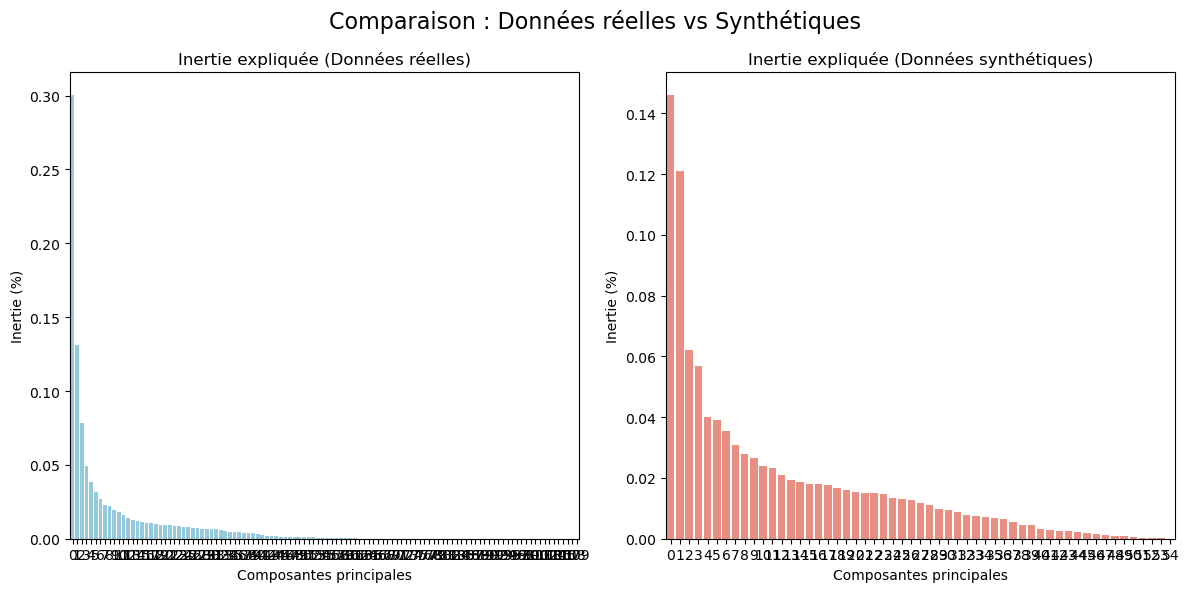

In [27]:
inertie_exp_df = val_pro_df/inertie_tot_df
inertie_exp_synth = val_pro_synth/inertie_tot_synth

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(inertie_exp_df, color="skyblue")
plt.xlabel("Composantes principales")
plt.ylabel("Inertie (%)")
plt.title("Inertie expliquée (Données réelles)")

plt.subplot(1,2,2)
sns.barplot(inertie_exp_synth, color="salmon")
plt.xlabel("Composantes principales")
plt.ylabel("Inertie (%)")
plt.title("Inertie expliquée (Données synthétiques)")
plt.suptitle("Comparaison : Données réelles vs Synthétiques", fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
first_compo_df = inertie_exp_df[0] + inertie_exp_df[1]
first_compo_synth = inertie_exp_synth[0] + inertie_exp_synth[1]

print(f"Les deux premières composantes pour les données de base expliquent : {round(first_compo_df*100,4)}% de la variabilité")
print(f"Les deux premières composantes pour les données synthétiques expliquent : {round(first_compo_synth*100,4)}% de la variabilité")

Les deux premières composantes pour les données de base expliquent : 43.21% de la variabilité
Les deux premières composantes pour les données synthétiques expliquent : 26.7131% de la variabilité


<hr>
<p><b>Les deux premières composantes principales des données brutes expliquent une variance plus importante par rapport aux données synthétiques</b>. Cela pourrait indiquer que les données brutes contiennent une structure plus complexe ou une variabilité intrinsèque plus riche. À l'inverse, les données synthétiques, possiblement générées ou transformées avec simplifications, perdent une partie de cette richesse.</p> 
    
<b style="color:blue">Hypothèse :</b>  
<p style="color:blue">La génération des données synthétiques pourrait avoir réduit leur diversité ou introduit des contraintes qui limitent la variance dans les premières composantes principales.</p>
<hr>

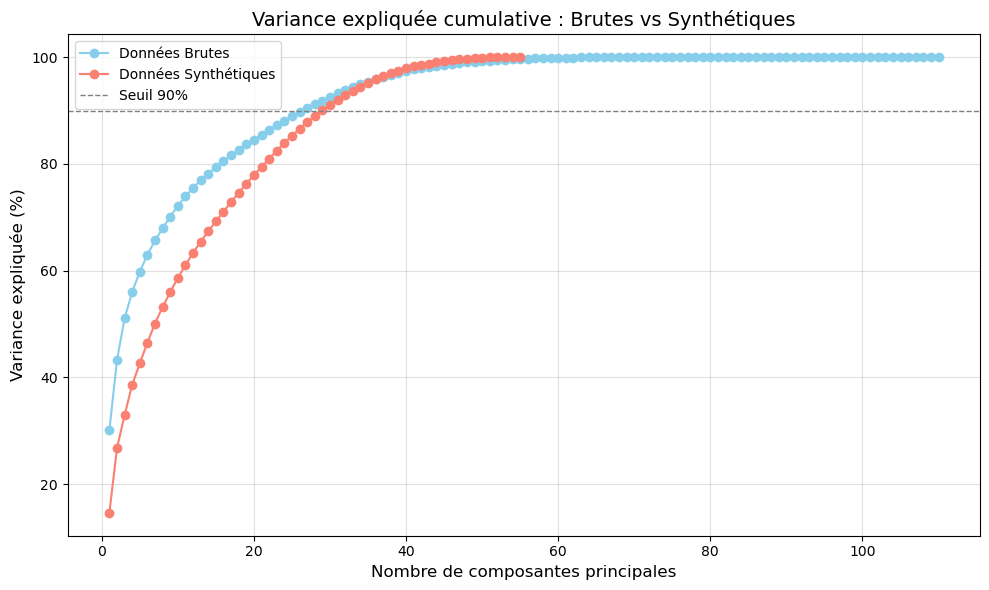

In [29]:
variance_expliquee_brutes = np.cumsum(val_pro_df / np.sum(val_pro_df)) * 100
variance_expliquee_synthetiques = np.cumsum(val_pro_synth / np.sum(val_pro_synth)) * 100
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(val_pro_df) + 1), variance_expliquee_brutes, marker='o', label="Données Brutes", color="skyblue")
plt.plot(range(1, len(val_pro_synth) + 1), variance_expliquee_synthetiques, marker='o', label="Données Synthétiques", color="salmon")
plt.title("Variance expliquée cumulative : Brutes vs Synthétiques", fontsize=14)
plt.xlabel("Nombre de composantes principales", fontsize=12)
plt.ylabel("Variance expliquée (%)", fontsize=12)
plt.axhline(y=90, color='gray', linestyle='--', linewidth=1, label="Seuil 90%")  # Ligne de seuil
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()

# Affichage
plt.tight_layout()
plt.show()

In [30]:
seuil = 90
nb_composantes_brutes = np.argmax(variance_expliquee_brutes >= seuil) + 1
nb_composantes_synthetiques = np.argmax(variance_expliquee_synthetiques >= seuil) + 1
print(f"Données Brutes : Il faut {nb_composantes_brutes} composantes pour expliquer au moins {seuil}% de la variance.")
print(f"Données Synthétiques : Il faut {nb_composantes_synthetiques} composantes pour expliquer au moins {seuil}% de la variance.")

Données Brutes : Il faut 27 composantes pour expliquer au moins 90% de la variance.
Données Synthétiques : Il faut 29 composantes pour expliquer au moins 90% de la variance.


<hr>
<p>Les données brutes permettent d'expliquer <b>80% de la variance</b> avec seulement <strong>27 composantes</strong>, contre <strong>29 composantes</strong> pour les données synthétiques. Pour rappel, après la suppression des variables utilisées pour la création des varaibles synthétiques il n'y avait que 55 variables restantes contre 110 variables après nettoyage pour les données brutes.</p>
<p>Cela indique que la variance des données brutes est plus concentrée dans les premières composantes principales, reflétant une structure plus cohérente ou des corrélations plus fortes.</p>
<p>À l'inverse, les données synthétiques montrent une dispersion plus importante de l'information sur plusieurs dimensions, suggérant une perte de cohérence ou une dilution des relations entre les variables lors de leur génération.</p>
<hr>

<h3 style="color : blue":>4.3) Projection des données sur les composantes principales</h3>

<hr>
<p>Après avoir comparé l'inertie entre les deux datasets, nous nous sommes rendu compte que les composantes principales des données brutes avaient une variance expliquée plus importante <b>(43% contre 26%)</b>. Par conséquent, nous continuerons le reste de cette étude avec les composantes des données brutes.</p>
<p>Une autre étape importante en ACP est la projection des données sur les composantes principales afin de simplifier leur analyse, réduire leur dimension tout en conservant un maximum d'information, et mieux visualiser les relations entre les observations et les variables. Cela nous permettra d'identifier des schémas, clusters, ou anomalies dans l'espace réduit des composantes principales.</p>
<hr>


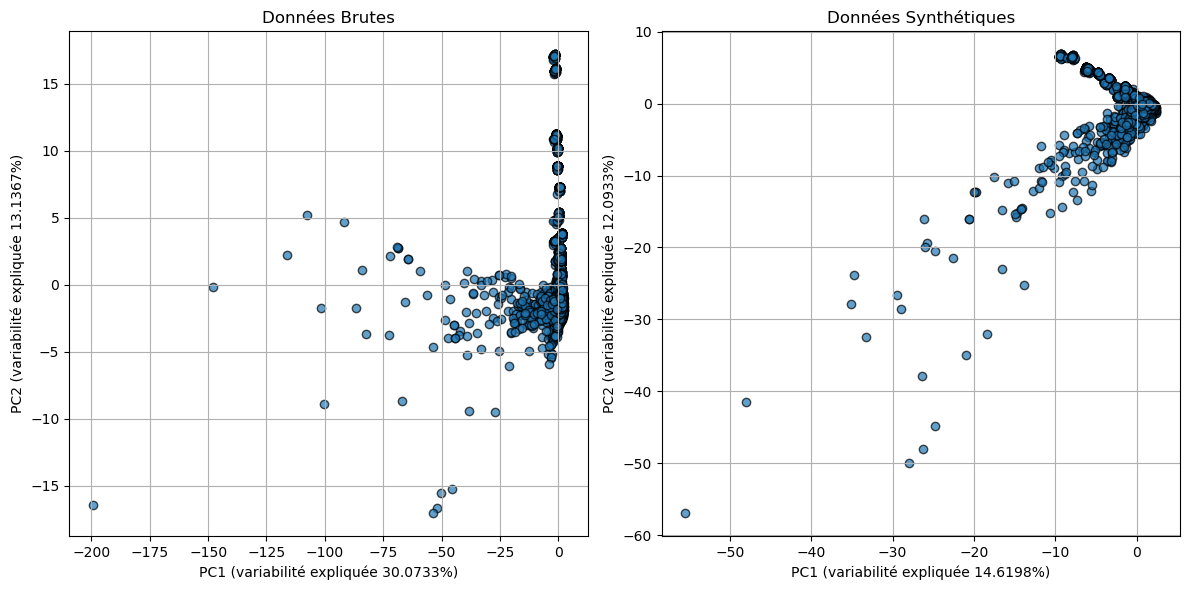

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_pro_df[:, 0], data_pro_df[:, 1], alpha=0.7, edgecolors="k")
plt.xlabel(f"PC1 (variabilité expliquée {round(inertie_exp_df[0] * 100, 4)}%)")
plt.ylabel(f"PC2 (variabilité expliquée {round(inertie_exp_df[1] * 100, 4)}%)")
plt.title("Données Brutes")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data_pro_synth[:, 0], data_pro_synth[:, 1], alpha=0.7, edgecolors="k")
plt.xlabel(f"PC1 (variabilité expliquée {round(inertie_exp_synth[0] * 100, 4)}%)")
plt.ylabel(f"PC2 (variabilité expliquée {round(inertie_exp_synth[1] * 100, 4)}%)")
plt.title("Données Synthétiques")
plt.grid(True)

plt.tight_layout()
plt.show()

<hr>
<p><u>En comparant les projections des données sur les deux premières composantes principales, plusieurs observations peuvent être faites :</u></p>

<b>1. Variance expliquée</b>
<ul>
  <li>Les données brutes affichent une variabilité expliquée par <code>PC1</code> et <code>PC2</code> plus élevée <b>(43.2% contre 26.7% pour les données synthétiques)</b>.</li>
  <li>Les données brutes capturent mieux les tendances énergétiques clés, indiquant une structure intrinsèque plus cohérente.</li>
</ul>

<b>2. Distribution des points</b>
<ul>
  <li><strong>Données Brutes :</strong> Les points sont densément regroupés autour de l'origine avec quelques outliers, ce qui reflète une homogénéité des performances énergétiques, avec des exceptions.</li>
  <li><strong>Données Synthétiques :</strong> Les points forment une distribution plus étalée, suggérant une structure biaisée ou une diversité réduite des performances énergétiques.</li>
</ul>

<b>3. Analyse des outliers</b>
<ul>
  <li>Dans les données brutes, les outliers pourraient représenter des bâtiments ayant des performances énergétiques extrêmement mauvaises ou très bonnes.</li>
  <li>Dans les données synthétiques, les outliers pourraient refléter des approximations ou limitations dans la génération des données.</li>
</ul>

<b>4. Cohérence entre les deux datasets</b>
<p>Les clusters ou schémas identifiés dans les données brutes devraient idéalement apparaître dans les données synthétiques.</p>
<p>Si les tendances diffèrent, cela pourrait indiquer que les données synthétiques ne reproduisent pas fidèlement les caractéristiques des performances énergétiques des bâtiments.</p>

<b style="color:blue">Hypothèse</b>
<p style="color:blue">Les données brutes semblent offrir une meilleure représentativité des performances énergétiques. Les données synthétiques, bien qu'utiles pour une exploration rapide ou des simulations, pourraient être moins fiables pour des conclusions précises sur les DPE.</p>
<hr>

<h3 style="color : blue":>4.4) Contribution des individus & qualité de représentation des individus</h3>

<p>En Analyse en Composantes Principales (ACP), deux concepts essentiels permettent d’analyser le rôle des individus dans la construction de l’espace factoriel : la contribution et la qualité de représentation.</p>

<p>Alors que la <strong>contribution</strong> mesure l’impact d’un individu dans la formation des composantes principales, la <strong>qualité de représentation</strong>, souvent exprimée par le cos² (
cos
⁡
2
), indique à quel point un individu est bien représenté dans le plan factoriel défini par les premières composantes principales.</p>

<p>La qualité de représentation est calculée comme le <b>rapport entre la part d’inertie (ou de variance) de l’individu capturée par une composante principale et l’inertie totale de l’individu.</b> Si cette valeur est élevée (proche de 1), cela signifie que l’individu est bien décrit par les axes en question. À l’inverse, une faible qualité (proche de 0) reflète une projection inadéquate sur ces axes, suggérant que l’individu est mieux représenté par d’autres composantes.</p>

<p>Dans le cadre de l’ACP, analyser conjointement la contribution et la qualité de représentation permet de comprendre non seulement le rôle des individus dans la construction des composantes, mais également dans quelle mesure ces composantes reflètent fidèlement leurs caractéristiques.</p>

<h4 style="color : green":>4.4.1) Contribution des individus</h4>

<hr>
<p>La contribution des individus en Analyse en Composantes Principales (ACP) est un indicateur clé qui permet de quantifier l'impact de chaque individu sur la définition des axes factoriels. En analysant ces contributions, on peut identifier les individus qui influencent le plus la formation des composantes principales et celles qui ont un rôle moindre dans la structure globale des données.</p>
<p>Les contributions élevées peuvent indiquer des individus atypiques ou des observations particulièrement représentatives des caractéristiques étudiées. À l'inverse, une contribution faible montre que l'individu a un impact limité dans la formation des axes et peut être considéré comme moins représentatif ou influent dans l'analyse.</p> 
<p>Cette mesure est essentielle pour une interprétation fine des résultats de l'ACP, en mettant en lumière les observations qui jouent un rôle prédominant dans l'organisation et la variance des données.</p>
<hr>

### Formule contribution

$$
\text{Contribution}_{\text{comp}}(i) = \frac{\text{Coordonnée}^2_{\text{comp}}(i)}{n \times \lambda_{\text{comp}}}
$$

où

- $\text{Contribution}_{\text{comp}}(i)$ : Contribution de l'individu $i$ à la composante principale $comp$
- $\text{Coordonnée}^2_{\text{comp}}(i)$ : Coordonnée de l'individu $i$ sur la composante principale $comp$
- $n$ : Nombre total d'individu
- $\lambda_{\text{comp}}$ : Valeur propre associée à la composante principale $comp$


<p>Pour s'interresser à la contribution des différents individus nous avons fait une fonction <code>contribution</code> permettant de calculer la contribution en % sur toutes les composantes.</p>

<p>Dans notre étude nous nous focaliserons sur les contributions des composantes princpales.</p>

In [32]:
def contribution(vec_pro,val_pro,comp1_index, comp2_index):

    pc1 = vec_pro_df[:, comp1_index]
    pc2 = vec_pro_df[:, comp2_index]
    n = len(vec_pro_df)  
    contribution_pc1 = ((pc1 ** 2) / (n * val_pro_df[comp1_index]))*100
    contribution_pc2 = ((pc2 ** 2) / (n * val_pro_df[comp2_index]))*100

    return contribution_pc1, contribution_pc2


<p>Nous allons comparer les contributions des composantes à l'aide d'un boxplot afin d'avoir une vue globale de la répartition de celles-ci.</p> 
<ul> 
    <li>Les <strong>valeurs minimales</strong>, représentant les individus ayant le plus faible impact sur la formation des composantes principales.</li> 
    <li>Les <strong>valeurs maximales</strong>, qui montrent les individus ayant une influence importante sur les axes factoriels.</li>            <li>Les <strong>médianes</strong>, indiquant la contribution centrale des individus, utile pour observer la tendance générale.</li> 
</ul> 
<p>Grâce au boxplot, il devient facile de repérer les individus atypiques ou ceux qui contribuent de manière significative à l'organisation des données dans l'espace des composantes principales.</p>

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\2836929847.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, patch_artist=True, labels=["Composante 1", "Composante 2"])


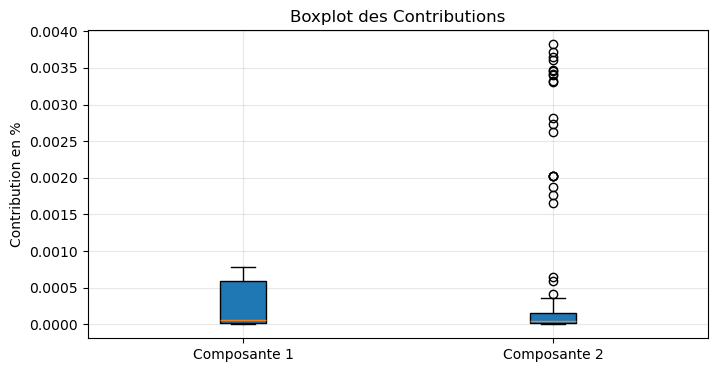

In [33]:
contrib_1, contrib_2 = contribution(vec_pro_df,val_pro_df,0, 1)
data = [contrib_1, contrib_2]

plt.figure(figsize=(8, 4))
plt.boxplot(data, vert=True, patch_artist=True, labels=["Composante 1", "Composante 2"])
plt.title("Boxplot des Contributions")
plt.ylabel("Contribution en %")
plt.grid(alpha=0.3)

plt.ticklabel_format(style='plain', axis='y')
plt.show()


<p><u>Voici le boxplot des contributions pour les deux axes, ici nous pouvons constater plusieurs choses :</u></p>

<ul> 
    <li>La contribution des individus pour la première composante est globalement plus élevée par rapport à la deuxième, comme le montrent les quartiles qui sont significativement supérieurs pour la première composante.</li> <li>La dispersion des contributions est également plus marquée pour la première composante, ce qui pourrait indiquer une diversité d'individus ayant un impact plus variable sur la formation de cet axe.</li> 
    <li>La deuxième composante présente des contributions plus faibles en général, avec une médiane proche de zéro et une concentration des valeurs autour de cette dernière. Cela suggère qu’elle capture des caractéristiques moins influentes pour la majorité des individus.</li>         <li>Les outliers visibles sur le boxplot pour la deuxième composante méritent une attention particulière. Ces individus atypiques pourraient jouer un rôle clé dans la définition de cet axe et représenter des observations spécifiques ou des groupes distincts.</li> 
</ul>

<h4 style="color : green":>4.4.2) Qualité de représentation des individus</h4>

<hr> 
<p>La qualité de représentation des individus en Analyse en Composantes Principales (ACP) est un indicateur essentiel qui évalue dans quelle mesure un individu est bien représenté dans le plan factoriel formé par les composantes principales. En analysant cette qualité, on peut identifier les individus pour lesquels les axes capturent fidèlement les caractéristiques, ainsi que ceux qui sont moins bien décrits dans cet espace réduit.</p> 
<p>Une qualité de représentation élevée indique que l'individu est correctement projeté sur les composantes principales et que ses spécificités sont bien expliquées par ces dernières. À l'inverse, une faible qualité reflète que l'individu est mieux représenté par des dimensions non incluses dans le plan observé, signalant qu'il contribue davantage à la variance de composantes secondaires.</p> 
<p>Cet indicateur est fondamental pour interpréter avec précision les résultats de l'ACP, en mettant en lumière les individus bien représentés dans le plan factoriel et en guidant l'analyse vers des dimensions complémentaires si nécessaire.</p> 
<hr>

### Formule qualité de représentation

$$
\text{Qualité}_{\text{comp}}(i) = \frac{\text{Coordonnée}^2_{\text{comp}}(i)}{\text{Norme}^2_{\text{individu}}}
$$

**où** :

- $\text{Qualité}_{\text{comp}}(i)$ : Qualité de représentation $cos^2$ de l'individu $i$ sur la composante principale $comp$
- $\text{Coordonnée}^2_{\text{comp}}(i)$ : Carré de la coordonnée de l'individu $i$ sur la composante principale $comp$
- $\text{Norme}^2_{\text{individu}}$ : Norme quadratique totale des coordonnées de l'individu $i$, calculée comme la somme des carrés de ses coordonnées sur toutes les composantes principales


<p>Pour s'interesser à la qualité de représentation des différents individus nous avons défini une fonction <code>qualite</code> permettant de pouvoir cacluler la qualité de chaque individus en fonction des indices de ces composantes</p>

In [34]:
def qualite(pro_data,comp1_index,comp2_index):
    pc1 = data_pro_df[:, comp1_index] 
    pc2 = data_pro_df[:, comp2_index] 
    
    norme_squared = np.sum(df_norm.values ** 2, axis=1)
    
    cos2_pc1 = ((pc1 ** 2) / norme_squared)*100
    cos2_pc2 = ((pc2 ** 2) / norme_squared)*100
        
    return pd.DataFrame({
    'cos2_PC1': cos2_pc1,
    'cos2_PC2': cos2_pc2,
})
    

<p>Afin de mieux visualiser la qualité de représentation des individus pour nos composantes principales nous allons visualiser la répartition de cette mesure de qualité à l'aide d'un violonplot qui est similaire à une boxplot.</p>

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\2889882886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Composante", y="Qualité", data=qualite_long, palette="muted", inner="quartile")


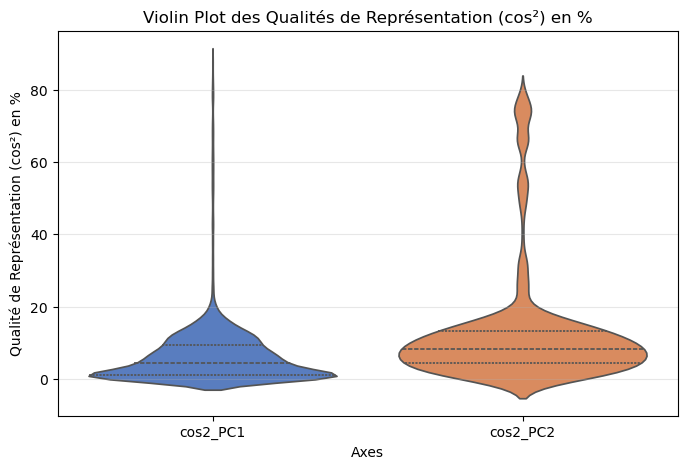

In [35]:
qualite_df = qualite(data_pro_df,0, 1)

qualite_long = pd.melt(qualite_df, var_name="Composante", value_name="Qualité")

plt.figure(figsize=(8, 5))
sns.violinplot(x="Composante", y="Qualité", data=qualite_long, palette="muted", inner="quartile")
plt.title("Violin Plot des Qualités de Représentation (cos²) en %")
plt.ylabel("Qualité de Représentation (cos²) en %")
plt.xlabel("Axes")
plt.grid(axis="y", alpha=0.3)
plt.show()

<p><u>Ce violonplot nous permet de constater plusieurs choses :</u></p> 
<ul> 
    <li>La majeure partie des individus a une qualité de représentation modérée pour les composantes principales, suggérant qu'ils sont bien projetés sur les axes factoriels analysés.</li> 
    <li>Pour la composante principale 1 (PC1), les individus ont une qualité de représentation faible avec quelques individus atypiques qui vont avoir une qualité de représentation supérieur à 80%.</li> 
    <li>Pour la composante principale 2 (PC2), Une proportion plus importante d’individus atteint des valeurs de cos² entre 10% et 20%, avec une longue traîne allant jusqu’à plus de 80%. Cela indique que PC2 est globalement plus pertinent pour représenter les individus que PC1 dans ce jeu de données.</li> 
    <li>Les valeurs extrêmes (outliers) sur les deux composantes permettent d'identifier des individus atypiques ou influents, qui mériteraient une analyse approfondie pour comprendre leur rôle dans la structure globale.</li> 
</ul> 
<p>En résumé, PC2 offre une meilleure qualité de représentation globale des individus que PC1, des outliers sont </p>

In [36]:
qual1_moy = qualite_df['cos2_PC1'].mean()
qual2_moy = qualite_df['cos2_PC2'].mean()

print(f"La qualité moyenne pour les individus représentés sur la PC1 est : {round(qual1_moy,2)}%")
print(f"La qualité moyenne pour les individus représentés sur la PC2 est : {round(qual2_moy,2)}%")

La qualité moyenne pour les individus représentés sur la PC1 est : 6.57%
La qualité moyenne pour les individus représentés sur la PC2 est : 12.97%


<p>On voit qu'en moyenne la qualité de représentation des individus sur la première composante principale est 2 fois moins importante que sur la deuxième, ce qui conforte notre précédente interprétation du violonplot.</p>

In [59]:
def seuil_qual(seuil):

    seuil = float(input("entrez un seuil : "))
    
    top_individus_pc1 = qualite_df[qualite_df['cos2_PC1'] > seuil]

    print(f"Individus avec une qualité supérieure à {seuil}% pour PC1 :")
    print(len(top_individus_pc1))

    top_individus_pc2 = qualite_df[qualite_df['cos2_PC2'] > seuil]

    print(f"\nIndividus avec une qualité supérieure à {seuil}% pour PC2 :")
    print(len(top_individus_pc2))

In [60]:
seuil_qual(seuil)

entrez un seuil :  70


Individus avec une qualité supérieure à 70.0% pour PC1 :
44

Individus avec une qualité supérieure à 70.0% pour PC2 :
293


<h4 style="color : green":>4.4.3) Conclusion</h4>

<hr>
<p>La contribution des individus dans l'ACP mesure l'impact de chaque observation sur la formation des axes factoriels. Pour la composante principale 1 (PC1), des contributions homogènes et relativement élevées indiquent que cet axe capture des tendances générales, influencées de manière équilibrée par la plupart des individus. En revanche, pour la composante principale 2 (PC2), la présence de contributions très disparates, avec des individus aux impacts disproportionnés, montre que cet axe met en évidence des caractéristiques spécifiques ou atypiques des données.</p>

<p>La qualité de représentation (cos²) évalue dans quelle mesure un individu est bien décrit par les axes factoriels. Pour PC1, la qualité élevée pour la majorité des individus reflète la pertinence de cet axe pour représenter les structures globales des données. Pour PC2, la qualité est plus variable : certains individus sont très bien représentés, tandis que d'autres montrent des valeurs plus faibles, indiquant que cet axe capture des dimensions secondaires ou des particularités spécifiques.</p>

<p>PC1 semble représenter les tendances dominantes de l'ensemble des données, offrant une description cohérente et globale des individus. En revanche, PC2 capture des nuances ou des anomalies influentes, signalant un rôle complémentaire dans la structuration des données. Cette dualité entre les axes met en lumière l'équilibre entre généralité et spécificité dans l'organisation des observations.</p>
<hr>

<h3 style="color : blue":>4.5) Cercle de corrélation</h3>

<hr>
<p><u>Nous avons analyser les contributions et qualités de représentation des individus sur nos composantes principales et nous avons pu constater plusieurs choses :</u></p>

<ul>
    <li>La contribution des individus à la formation des axes est plutôt homogène pour la première composante mais cette contribution est beaucoup plus dispersée pour la deuxième composante avec des outliers.</li>
    <li>La qualité de représentation des individus est nettement meilleur sur la deuxième composante pour la majorité des individus mais les individus avec la meilleur qualité de représentation sont issus de la première composante.</li>
</ul>

<p>Nous allons poursuivre notre étude avec un outil qui va permettre de quantifier la corrélation des différentes variables avec les composantes principales : <code>le cercle de corrélation</code></p>

<p>Chaque variable est représentée par un vecteur, et la longueur de ce vecteur indique la force de sa corrélation avec les composantes principales. Plus la variable est proche du cercle, plus elle est fortement corrélée avec ces axes. En interprétant les positions des vecteurs, on peut distinguer les variables qui sont bien expliquées par les composantes principales et celles qui contribuent davantage aux dimensions secondaires</p>
<hr>

### Formule du cercle de corrélation

Le cercle de corrélation permet de représenter graphiquement les corrélations entre les variables d'origine et les composantes principales. La formule utilisée pour calculer les coordonnées des variables est donnée par :

$$
\begin{pmatrix}
\sqrt{\lambda_1} P_{j1} \\
\sqrt{\lambda_2} P_{j2}
\end{pmatrix}
$$

**où** :
- $\text{Coordonnée}_{\text{comp}}(j)$ : Coordonnée de la variable $j$ dans l'espace des composantes principales.
- $\sqrt{\lambda_1}$, $\sqrt{\lambda_2}$ : Racines carrées des valeurs propres associées aux composantes principales 1 et 2.
- $P_{j1}, P_{j2}$ : Coefficients de la variable $j$ dans les vecteurs propres associés aux composantes principales 1 et 2.

Cette représentation permet de visualiser la contribution et la corrélation des variables avec les axes principaux dans un espace réduit. Les variables avec des coordonnées proches du bord du cercle sont fortement corrélées avec une ou plusieurs composantes principales, tandis que celles proches du centre sont faiblement corrélées.

Nous avons défini une fonction ``correlation_circle`` afin de pouvoir dessiner un cercle de corrélation en fonction des composantes que l'on veut mais surtout en fonction d'un certain seuil afin de visualiser uniquement les variables les plus corrélées et les mieux représentées.

In [39]:
from matplotlib.patches import Patch

def correlation_circle(vec_pro,val_pro,comp1_index=0, comp2_index=1, seuil=0):
    pc1 = vec_pro_df[:, comp1_index]
    pc2 = vec_pro_df[:, comp2_index]

    # Appliquer les facteurs d'échelle pour les composantes principales
    scaling_factors = np.sqrt(val_pro_df[[comp1_index, comp2_index]].flatten())
    pc1 = pc1 * scaling_factors[0]
    pc2 = pc2 * scaling_factors[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='dashed')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='dashed')

    # Cercle de corrélation
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=1.2)
    ax.add_artist(circle)

    norms = np.sqrt(pc1**2 + pc2**2)

    group1 = [] 
    group2 = []

    colors = ['blue', 'green']
    group_names = ['Groupe 1', 'Groupe 2']

    for i, column in enumerate(df_norm.columns):
        if norms[i] >= seuil:
            angle = np.arctan2(pc2[i], pc1[i])
            angle = angle if angle >= 0 else angle + 2 * np.pi  # Ramener dans [0, 2π]

            if 0 <= angle <= np.pi:
                group1.append((pc1[i], pc2[i], column))
            else:
                group2.append((pc1[i], pc2[i], column))

    for group, color in zip([group1, group2], colors):
        for x, y, var_name in group:
            plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.05, color=color, alpha=0.8)
            plt.text(x * 1.1, y * 1.1, var_name, fontsize=9, color=color)

    legend_patches = [Patch(color=colors[i], label=group_names[i]) for i in range(2)]
    plt.legend(handles=legend_patches, loc='upper left', fontsize=9)

    plt.xlabel(f"Composante {comp1_index + 1} (variabilité expliquée : {round(inertie_exp_df[comp1_index] * 100, 2)}%)")
    plt.ylabel(f"Composante {comp2_index + 1} (variabilité expliquée : {round(inertie_exp_df[comp2_index] * 100, 2)}%)")
    plt.title(f"Cercle des Corrélations (groupes par angle, seuil = {seuil})")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    grouped_variables = {
        group_names[0]: [var[2] for var in group1],
        group_names[1]: [var[2] for var in group2]
    }

    return grouped_variables


<hr>
<h2>Calcul de la norme dans <code>correlation_circle</code></h2>

<p>Le calcul de la norme est un aspect clé dans cette fonction, car il détermine la longueur des vecteurs associés aux variables dans le cercle de corrélation. La norme est utilisée ici pour mesurer l’intensité de la contribution d’une variable à l’espace des composantes principales.</p>

<h3>Formule utilisée :</h3>
<p>Pour chaque vecteur (lié à une variable), la norme est calculée comme suit :</p>
<pre><code>
norms = np.sqrt(pc1**2 + pc2**2)
</code></pre>

<p>C’est une application directe de la <strong>norme euclidienne</strong>, qui correspond à la distance du point (<code>pc1[i]</code>, <code>pc2[i]</code>) à l’origine (0,0) dans un plan 2D. Elle suit la formule classique :</p>
<pre><code>
||v|| = √(x² + y²)
</code></pre>

<p>Dans ce cas, <code>pc1</code> et <code>pc2</code> sont les coordonnées projetées de chaque variable sur les deux composantes principales.</p>

<h3>Utilité dans la fonction :</h3>
<ul>
    <li>La norme est utilisée pour vérifier si une variable dépasse un certain seuil (<code>seuil</code>) :</li>
    <pre><code>
if norms[i] >= seuil:
    ...
    </code></pre>
    <li>Cela permet de filtrer les vecteurs selon leur pertinence dans le cercle de corrélation. Les variables ayant une norme trop faible ne sont pas considérées comme significatives dans cette projection.</li>
</ul>

<h3>Visualisation et interprétation :</h3>
<p>Les vecteurs tracés dans le cercle ont une longueur proportionnelle à leur norme. Cela signifie que :</p>
<ul>
    <li><strong>Une norme proche de 1 :</strong> Indique une forte corrélation de la variable avec au moins une des deux composantes principales.</li>
    <li><strong>Une norme faible :</strong> Montre que la variable n’est que faiblement représentée dans cet espace.</li>
</ul>

<h3>Conclusion :</h3>
<p>Le calcul de la norme dans cette fonction est essentiel pour identifier les variables qui contribuent significativement aux composantes principales. Il permet également de filtrer les données en fonction d’un seuil, améliorant ainsi la clarté et la lisibilité de la visualisation.</p>


<h3>Comprendre la partie trigonométrique dans la fonction <code>correlation_circle</code></h3>

<p>La fonction repose sur une logique géométrique pour classer les vecteurs en fonction de leur direction dans un cercle de corrélation. Chaque vecteur est associé à une variable et est défini par ses coordonnées (<code>pc1[i]</code> et <code>pc2[i]</code>) projetées dans l’espace des composantes principales.</p>

<h3>Étapes trigonométriques clés :</h3>

<ul>
    <li>
        <strong>Calcul de l’angle :</strong> L'angle entre le vecteur et l'axe horizontal (Composante principale 1) est déterminé par la fonction 
        <code>np.arctan2(pc2[i], pc1[i])</code>. Cela permet de calculer avec précision l’orientation des vecteurs, y compris dans les quadrants négatifs.
    </li>
    <li>
        <strong>Normalisation des angles :</strong> Les angles calculés sont ramenés dans l’intervalle [0, 2π] pour garantir une cohérence d’interprétation :
        <pre><code>
angle = angle if angle >= 0 else angle + 2 * np.pi
        </code></pre>
        Cela assure que tous les vecteurs sont correctement positionnés sur le cercle, sans ambiguïté pour les directions.
    </li>
    <li>
        <strong>Classification par quadrants :</strong> Une fois l’angle déterminé, les vecteurs sont regroupés en deux groupes :
        <ul>
            <li><em>Groupe 1</em> : Vecteurs dont l’angle est dans l’intervalle [0, π] (premier et deuxième quadrants).</li>
            <li><em>Groupe 2</em> : Vecteurs dont l’angle est dans l’intervalle [π, 2π] (troisième et quatrième quadrants).</li>
        </ul>
        Cette étape utilise des propriétés angulaires pour diviser visuellement les vecteurs dans le cercle.
    </li>
</ul>

<h3>Visualisation :</h3>
<p>Chaque vecteur est dessiné depuis l’origine (0, 0) avec ses coordonnées (<code>pc1[i]</code>, <code>pc2[i]</code>). Les directions sont ainsi représentées par des flèches colorées, permettant d’interpréter la contribution de chaque variable :</p>

<ul>
    <li>Les variables dans <strong>Groupe 1</strong> apparaissent dans la partie supérieure du cercle (angles [0, π]).</li>
    <li>Les variables dans <strong>Groupe 2</strong> apparaissent dans la partie inférieure du cercle (angles [π, 2π]).</li>
</ul>

<h3>Conclusion :</h3>
<p>Cette logique trigonométrique exploite l’orientation angulaire des vecteurs pour regrouper et afficher les variables en fonction de leur contribution aux composantes principales. Elle utilise des outils simples (angle et norme) pour traduire la géométrie d’un espace multidimensionnel en un visuel interprétable dans un plan 2D.</p>
<hr>

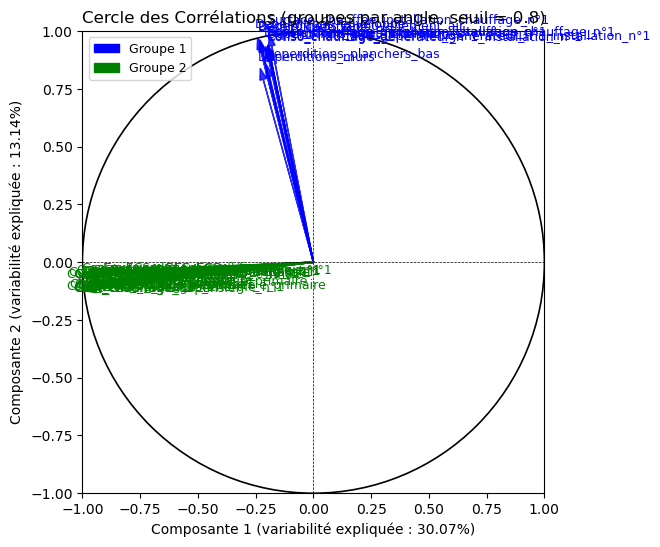

{'Groupe 1': ['Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Déperditions_ponts_thermiques', 'Déperditions_renouvellement_air', 'Besoin_chauffage', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Surface_chauffée_installation_chauffage_n°1', 'Conso_chauffage_générateur_n°1_installation_n°1', 'Conso_chauffage_dépensier_générateur_n°1_installation_n°1'], 'Groupe 2': ['Conso_5_usages_é_finale', 'Conso_chauffage_é_finale', 'Conso_chauffage_dépensier_é_finale', 'Conso_éclairage_é_finale', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_finale', 'Conso_5_usages_é_primaire', 'Conso_chauffage_é_primaire', 'Conso_chauffage_dépensier_é_primaire', 'Conso_éclairage_é_primaire', 'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_primaire', 'Emission_GES_5_usages', 'Emission_GES_chauffage', 'Emission_GES_chauffage_dépensier', 'Emission_GES_éclairage', 'Emission_GES_ECS', 'Emission_GES_ECS_dép

In [40]:
groupes = correlation_circle(vec_pro_df,val_pro_df,comp1_index=0, comp2_index=1, seuil=0.8)
print(groupes)

<hr>
<p>Voici à quoi ressemble le cercle de corrélation avec uniquement les variables supérieures ou égales au seuil de 80%.</p>
<p><u>Comme nous pouvons le voir ce cercle est séparer en 2 groupes : </u></p>
<ul>
    <li><span style="color : green">Le groupe vert</span> : regroupant les différentes <b>deperditions, conso n°1  et le besoin chauffage.</b></li>
    <li><span style="color : blue">Le groupe bleu</span> : regroupant les différentes <b>consos finales, primaires et émissions et les coûts.</b></li>
</ul>
<p>Ce que nous pouvons également dire est que toutes ces variables sont corrélées positivement, si on prend le groupe vert pour exemple cela voudrait dire que plus la déperdition est grande plus le besoin de chauffage sera élevé étant donné que la déperdition qualifie la perte d'énergie sous forme de chaleur des maisons mal isolées. </p>

<p>De même pour les variables corrélées positivement en vert, plus l'emission d'eau chaude sanitaire est importante plus le coût total d'eau chaude sanitaire va être important.</p>

<p>Ce cercle de corrélation nous permet de comprendre toutes les relations entre les variables fortement corrélées. De plus la longueur de ces vecteurs nous permet d'affirmer que ces variables sont biens représentées dans notre plan.</p>
<hr>

<p>Pour rappel nous avons précédemment créé des variables synthétiques en regroupant toutes les variables corrélées entre elles à partir d'un certains seuil et à l'aide de notre fonction <code>groupes_corr</code>. Il serait interréssant de voir si les variables que nous avons supprimées afin de créer ces nouvelles variables synthétiques font parties des deux groupes que nous avons formés juste avant à l'aide du cercle de corrélation.</p>

In [41]:
liste_variables = []
for variables in groupes.values():
    liste_variables.extend(variables)

set_liste_variables = set(liste_variables)
set_colonne_supp = set(colonne_supp)

var_same = set_liste_variables & set_colonne_supp # permet de récupérer les variables appartenant aux deux listes

print(f"Voici les variables que nous avons utilisées pour créer nos données synthétiques :\n {var_same}")
print()
print(f"Pourcentage des variables issues de celles supprimées et du groupe formé : {round((len(var_same)/len(colonne_supp))*100,2)}%")

Voici les variables que nous avons utilisées pour créer nos données synthétiques :
 {'Conso_ECS_é_finale', 'Coût_ECS_dépensier', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Coût_total_5_usages_énergie_n°1', 'Conso_5_usages_é_primaire', 'Besoin_chauffage', 'Surface_chauffée_installation_chauffage_n°1', 'Conso_chauffage_dépensier_é_primaire', 'Emission_GES_chauffage_dépensier', 'Conso_éclairage_é_finale', 'Déperditions_murs', 'Coût_chauffage', 'Coût_total_5_usages', 'Deperditions_baies_vitrées', 'Conso_éclairage_é_primaire', 'Déperditions_ponts_thermiques', 'Emission_GES_5_usages_énergie_n°1', 'Conso_chauffage_é_finale_énergie_n°1', 'Emission_GES_chauffage', 'Emission_GES_ECS', 'Coût_chauffage_dépensier', 'Coût_ECS', 'Emission_GES_ECS_dépensier', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_générateur_n°1_installation_n°1', 'Conso_ECS_é_primaire', 'Coût_éclairage', 'Deperditions_enveloppe', 'Déperditions_renouvellement_air', 'Coût_chauffage_énergie_n°1', 'C

<hr>
<p>Nous constatons que <b>56 % des variables supprimées lors de la création de nos groupes synthétiques se retrouvent intégrées dans le nouveau groupe formé</b>. Cela souligne la cohérence de notre démarche de synthèse, qui a permis de préserver une part significative des informations pertinentes tout en réduisant efficacement le nombre total de variables. Pour rappel, avec notre synthèse nous avions supprimé 187 variables.</p>
<hr>

<h2>5) Conclusion</h2>

<p>L'analyse en composantes principales (ACP) que nous avons menée sur les données du <b>Diagnostic de Performance Énergétique (DPE)</b> a permis de réduire la dimensionnalité tout en conservant une part significative de l'information initiale. En identifiant les variables les plus représentatives grâce aux cercles de corrélation, nous avons pu interpréter les axes principaux de manière pertinente. Par ailleurs, la création de variables synthétiques par regroupement de variables fortement corrélées a permis d'optimiser notre jeu de données tout en maintenant sa richesse descriptive.

Le fait que plus de <b>50 % des variables supprimées soient présentes dans les groupes synthétiques confirme la cohérence de notre démarche.</b> L’ACP s’est donc révélée être un outil puissant pour simplifier l’analyse sans perdre de vue les objectifs de compréhension et de modélisation.</p>

<h2>6) Classification automatique (KMeans)</h2>

<p>Après avoir réduit la dimensionnalité de notre Dataset à l'aide d'une <b>Analyse en Composantes Principales (ACP)</b>, nous avons pu projeter les données dans un espace réduit, tout en conservant une grande partie de l'information essentielle. Cette étape nous permet de mieux visualiser et analyser les relations entre les points de données.</p>

<p>Nous allons maintenant appliquer une méthode de <b>classification, le KMeans</b>. Cette technique de clustering nous aidera à identifier des sous-groupes dans les données, et en particulier à détecter les <code>outliers</code>. Les outliers, ou points aberrants, sont des données qui se situent en dehors des clusters principaux et qui présentent des comportements ou caractéristiques distincts par rapport aux autres.</p>

<p><u>L'objectif est de comprendre pourquoi ces outliers sont si différents des autres. Cela peut être dû à plusieurs facteurs :</u></p> 
<ul> 
    <li>Des valeurs extrêmes dans certaines variables qui les rendent éloignés des autres points dans l'espace ACP.</li> 
    <li>Des relations inhabituelles ou incohérentes entre les variables qui les démarquent des tendances générales du dataset.</li> 
    <li>La présence d'erreurs dans les données, comme des anomalies de saisie ou des mesures défaillantes.</li> 
    <li>Des caractéristiques réelles distinctes qui correspondent à des comportements ou catégories uniques dans le contexte étudié.</li> 
</ul> 
<p>Grâce à cette classification et à une analyse approfondie des outliers, nous pourrons mieux comprendre les structures sous-jacentes des données et identifier des axes d'amélioration, que ce soit dans la collecte des données, leur pré-traitement, ou dans l'interprétation des phénomènes observés.</p>


<h3 style="color : blue":>6.1) Import des librairies</h3>

<p><u>Pour réaliser notre classifcation nous importons différents modules de la librairie <code>scikit-learn</code> : </u></p>
<ul>
    <li>StandardScaler : Issue du module <code>sklearn.preprocessing</code> importer par convention mais n'a pas un réel intérêt étant donnée que nous utiliserons les données projetées sur nos composantes principales.</li>
    <li>KMeans : Issue du module <code>sklearn.cluster</code> importer afin de pouvoir regrouper nos données dans différents clusters.</li>
    <li>metrics : Issue du module <code>sklearn</code> importer afin d'évaluer la performance de notre classification, ici nous utiliserons <code>silhouette score</code>.</li>
</ul>

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn import metrics

<p>Nous utiliserons notre algorithme du <code>KMeans</code> sur les composantes permettant d'expliquer <b>90% de la variation</b>. Pour cela, nous avons récupéré notre fonction précédement utilisée <code>acp</code> en rajoutant un paramètre <code>seuil_variance</code> fixé à 0.9 qui va justement nous permettre de récupérer toutes les composantes jusqu'à expliquer 90% de la variance.</p>

<h3 style="color : blue":>6.2) Modfication de la fonction acp</h3>

In [43]:
def acp(df_norm, seuil_variance=0.9):
    matrix_corr = df_norm.corr()

    val_propre, vec_propre = np.linalg.eig(matrix_corr)

    sorted_indices = np.argsort(val_propre)[::-1]
    val_propre = val_propre[sorted_indices]
    vec_propre = vec_propre[:, sorted_indices]

    variance_expliquee = val_propre / np.sum(val_propre)
    variance_cumulee = np.cumsum(variance_expliquee)

    nb_composantes = np.argmax(variance_cumulee >= seuil_variance) + 1 # permet de fixé le seuil

    vec_propre_reduits = vec_propre[:, :nb_composantes] # afin de récupérer les vecteurs jusqu'au seuil

    df_projected = np.dot(df_norm, vec_propre_reduits)

    return val_propre, vec_propre, df_projected, nb_composantes


In [44]:
valeurs_propres, vecteurs_propres, donnees_projetees, nb_comp = acp(df_norm, seuil_variance=0.9)
print(f"Nombre de composantes gardées : {nb_comp}")

Nombre de composantes gardées : 27


<h3 style="color : blue":>6.3) La méthode du coude "Elbow Method"</h3>

<p>La méthode du coude (<i>Elbow Method</i>) est une technique utilisée pour déterminer le <b>nombre optimal de clusters</b> à former dans une analyse de clustering. Elle repose sur l'évaluation de la <b>somme des carrés intra-cluster</b> (WCSS), une mesure qui quantifie la cohésion des données au sein des clusters.  

<u>Le principe est simple :</u> 
<ul>
    <li>Lorsque le nombre de clusters augmente, le WCSS diminue, car chaque cluster devient plus petit et mieux adapté aux données qu'il contient.</li>
    <li>Cependant, après un certain point, le bénéfice d'ajouter des clusters supplémentaires devient négligeable.</li>  
    
<li>Ce point d'inflexion, souvent appelé le <b>"coude"</b>, correspond au nombre idéal de clusters. Il marque un équilibre entre la réduction de la variance intra-cluster et la complexité du modèle. Cette méthode est largement utilisée pour garantir des groupes pertinents et éviter de surajuster les données.</li>
</ul>

$$
WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
$$
**où**
-  $x_j$: Représente un point de données appartenant au cluster $C_i$.
- $\mu_i$: Centre (ou centroïde) du cluster $C_i$.
- $||x_j - \mu_i||^2$: Distance euclidienne au carré entre le point $x_j$ et le centre $\mu_i$.
- $C_i$: Un cluster, qui regroupe des points similaires.
- $k$: Nombre total de clusters.


<p>Il est primordial pour nous de déterminer le nombre optimal de composantes à conserver, car cette étape sera essentielle pour appliquer la <code>Elbow Method</code>. Cette méthode nous permettra d'identifier le nombre idéal de groupes afin de garantir la formation de clusters représentatifs et pertinents.</p>

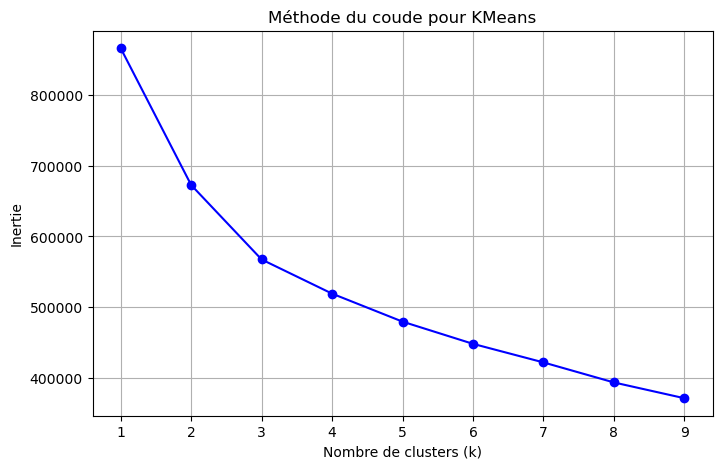

In [45]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=55)
    kmeans.fit(donnees_projetees)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour KMeans")
plt.grid()
plt.show()

<hr>
<p>D'après cette courbe nous devrions prendre 3 clusters étant données que l'inertie se stabilise de plus en plus après trois clusters. Cependant nous allons prendre deux clusters étant donné que nous voulons capturer les outliers. Si nous prenons <code>n_clusters=2</code> nous aurons plus de chance de discriminer convenablement les données simples des données atypiques.</p>
<hr>

<h3 style="color : blue":>6.4) Projection des données clusterisées sur les composantes principales</h3>

<p>Ce code initialise un modèle <code>KMeans</code> avec 2 clusters pour notre classification. Il attribue chaque point de nos <code>donnees_projetees</code> à l'un des deux groupes, en identifiant ceux qui se démarquent des autres. Les étiquettes, stockées dans <code>clusters</code>, nous aideront à comprendre et analyser les différences, y compris la détection des outliers.</p>

In [63]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(donnees_projetees)

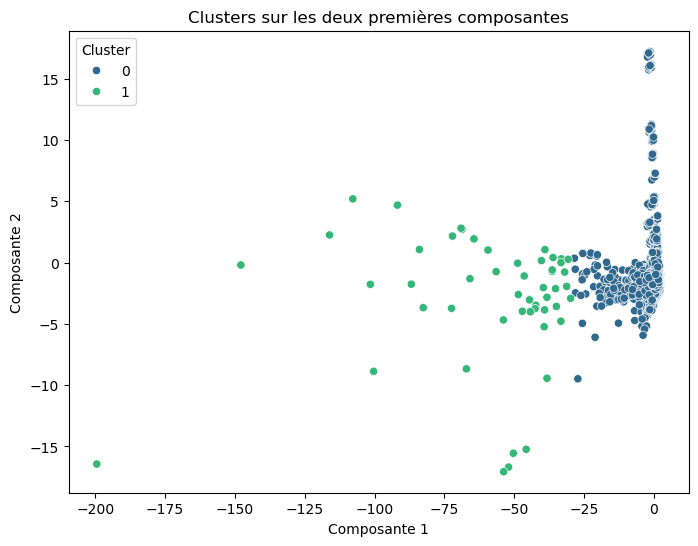

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=donnees_projetees[:, 0], y=donnees_projetees[:, 1], hue=clusters, palette='viridis')
plt.title("Clusters sur les deux premières composantes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.legend(title="Cluster")
plt.show()

<p><u>Après projection de nos individus sur les composantes principales on est maintenant capable de discerner deux groupes :</u></p>
<ul>
    <li>Dans le premier cluster (0) : la dispertion des <b>données "normales"</b>.</li>
    <li>Dans le deuxième cluster (1) : la dispertion des <b>données "attypiques"</b>.</li>
</ul>
<p>Cette étape est celle qui va nous permettre de filtrer les logements normaux et ceux qui sont attypiques</p>

<h3 style="color : blue":>6.5) Le silhouette score</h3>

<p>Il aide à juger si les clusters sont bien formés, avec des objets similaires regroupés ensemble et des clusters bien distincts.Il est souvent utilisé pour comparer les résultats de clustering avec différents nombres de clusters, afin de choisir celui qui maximise le <code>Silhouette Score.</code></p>
<p><u>Diagnostic :</u></p>
<ul>
    <li>Un score proche de 1 indique une bonne séparation.</li>
    <li>Un score proche de 0 suggère des clusters qui se chevauchent.</li>
    <li>Un score négatif montre des points potentiellement mal classés.</li>
</ul>

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**où :**
- $a(i)$: La distance moyenne entre le point $i$ et les autres points du même cluster.
- $b(i)$: La distance moyenne entre le point $i$ et les points du cluster le plus proche auquel il n’appartient pas.
- $s(i)$: Le score de silhouette du point $i$, qui varie entre -1 et 1.


In [65]:
from sklearn.metrics import silhouette_score

score = silhouette_score(donnees_projetees, clusters)
print(f"Score silhouette : {round(score*100,2)}%")

Score silhouette : 87.67%


<p>Ici notre <b>silouhette score est proche de 88%</b>, on peut donc considérer que nos clusters sont bien séparés.</p>

<h3 style="color : blue":>6.6) Ajout de la colonne "clusters"</h3>

<p>Après avoir réparti chaque individu à un cluster nous allons ajouter une colonne <code>clusters</code> afin de pouvoir filtrer nos outliers.</p>

In [66]:
df_quanti["clusters"] = clusters
df_quanti

,Appartement_non_visité_(0/1),Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Code_postal_(BAN),Score_BAN,...,Conso_chauffage_dépensier_générateur_n°1_installation_n°2,Conso_é_finale_installation_ECS,Conso_é_finale_dépensier_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Surface_habitable_desservie_par_installation_ECS,Conso_é_finale_générateur_ECS_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Volume_stockage_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an),clusters
0,0.000000,1978.000000,2.5,1.00000,2.000000,2.0,3154.219874,113.2,63540.0,0.96,...,2586.400000,2432.2,3140.0,1.0,113.2,2432.2,3140.0,200.0,0.0,0
1,0.000000,2000.000000,2.5,1.00000,2.000000,2.0,3154.219874,68.5,56690.0,0.79,...,4847.982026,498.6,703.3,1.0,68.5,498.6,703.3,150.0,0.0,0
2,0.000000,1948.000000,2.5,15.00000,4.000000,1.0,974.500000,66.3,62800.0,0.71,...,4847.982026,15172.4,20492.3,15.0,66.3,15172.4,20492.3,1500.0,0.0,0
3,0.000000,2013.000000,3.3,1.00000,1.000000,1.0,34.400000,34.4,33000.0,0.98,...,4847.982026,1522.3,1929.2,1.0,34.4,1522.3,1929.2,150.0,0.0,0
4,0.766976,2009.000000,2.5,21.62931,5.138502,1.0,3154.219874,124.0,47310.0,0.50,...,4847.982026,2271.2,2873.2,1.0,124.0,2271.2,2873.2,250.0,9113.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,1.000000,1970.815497,2.5,46.00000,12.000000,1.0,3468.000000,90.0,93130.0,0.97,...,4847.982026,229931.0,322319.0,1.0,3468.0,229931.0,322319.0,0.0,0.0,0
8714,1.000000,1956.000000,2.5,12.00000,3.000000,1.0,552.000000,46.0,54400.0,0.62,...,13889.000000,2042.0,2607.6,1.0,184.0,2042.0,2607.6,0.0,0.0,0
8715,0.766976,1970.815497,2.4,21.62931,5.138502,2.0,3154.219874,97.2,42310.0,0.33,...,4847.982026,3031.4,3632.3,1.0,97.2,3031.4,3632.3,150.0,0.0,0
8716,0.766976,1970.815497,2.5,1.00000,5.138502,1.0,1000.000000,88.0,62100.0,0.61,...,4847.982026,2253.8,2875.0,1.0,88.0,2253.8,2875.0,200.0,0.0,0


<p>On va faire un <code>groupby(['clusters'])</code> afin de constater les différences existantes entre les logements normaux et attypiques.</p>

In [67]:
df_clusters = df_quanti.groupby(['clusters']).mean().round(0)
df_clusters

,Appartement_non_visité_(0/1),Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Code_postal_(BAN),Score_BAN,...,Conso_chauffage_générateur_n°1_installation_n°2,Conso_chauffage_dépensier_générateur_n°1_installation_n°2,Conso_é_finale_installation_ECS,Conso_é_finale_dépensier_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Surface_habitable_desservie_par_installation_ECS,Conso_é_finale_générateur_ECS_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Volume_stockage_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an)
clusters,,,,,,,,,,,,,,,,,,,,,
0,1.0,1971.0,3.0,21.0,5.0,1.0,3157.0,70.0,55309.0,1.0,...,3859.0,4799.0,12730.0,17667.0,1.0,463.0,12730.0,17667.0,140.0,14.0
1,1.0,1969.0,3.0,53.0,6.0,1.0,2747.0,70.0,58788.0,1.0,...,9948.0,12555.0,61438.0,85944.0,5.0,1965.0,61438.0,85944.0,184.0,0.0


<p>En comparant les valeurs moyennes de nos différents clusters par variables on remarque que les différentes consommations sont systématiquement plus grandes pour le <b>deuxième groupe de logement (les logements attypiques).</b></p>

<p>La prochaine étapes consistera à récupérer les variables les plus pertinentes afin de comparer les logements normaux et attypiques.</p>

<h3 style="color : blue":>6.7) Comparaison entre les logements "normaux" et "attypiques"</h3>

<p>Notre <code>KMeans</code> nous a permis de séparer en deux groupes les logements normaux et attypiques. Maintenant nous allons essayer de comprendre qu'est ce qui fait qu'un logement est normal ou attypique.</p>

<p><u>Pour cela nous allons suivre les étapes suivantes : </u></p>
<ul>
    <li>Initialisation de deux variables : <code>logement_attypique</code> et <code>logement_normaux</code>.</li>
    <li>Décupérer les variables fortement corrélées issues de notre cercle de corrélation.</li>
    <li>Classer ces variables dans différents groupes en utilisant des expressions régulières.</li>
    <li>Définir une fonction permettant de comparer les logements normaux et attypiques en fonction des différents groupes.</li>
</ul>

<h4 style="color : green":>6.7.1) Récupération des logement "attypiques" et "normaux"</h4>

In [68]:
logement_attypique = df_quanti[df_quanti["clusters"]==1]

In [69]:
var_list = list(var_same)
logement_att_col = logement_attypique[var_list]

In [70]:
logement_normaux = df_quanti[df_quanti["clusters"]==0]

<h4 style="color : green":>6.7.2) Utilisation de regex pour classer les différentes variables</h4>

In [71]:
import re

var_list = list(var_same)  
conso_list = [col for col in var_list if re.search(r'conso', col, re.IGNORECASE)]
deperdition_list = [col for col in var_list if re.search(r'd[ée]perdition', col, re.IGNORECASE)]
cout_list = [col for col in var_list if re.search(r'Coût', col, re.IGNORECASE)]
emission_list = [col for col in var_list if re.search(r'Emission', col, re.IGNORECASE)]
besoin_list = [col for col in var_list if re.search(r'Besoin', col, re.IGNORECASE)]
surface_list = [col for col in var_list if re.search(r'surface', col, re.IGNORECASE)]

<p>Par manque de volonté de récupérer les différents groupes à la main, nous avons utilisé la librairie <code>re</code>, signifiant <code>regular expression</code>, qui nous a permis de parcourir notre <code>var_list</code> à travers la fonction <code>re.search()</code>. Cette fonction est particulièrement utile pour retrouver des motifs spécifiques dans les chaînes de caractères, tout en évitant la casse grâce à l'option <code>re.IGNORECASE</code>, permettant ainsi de rendre la recherche insensible aux majuscules et minuscules.</p>

<p><u>À partir de cette approche nous avons pu créer 5 différents groupes :</u></p>
<ul>
    <li><code>conso_list</code></li>
    <li><code>deperdition_list</code></li>
    <li><code>cout_list</code></li>
    <li><code>emission_list</code></li>
    <li><code>besoin_list</code></li>
    <li><code>surface_list</code></li>
</ul>

<p>Nous pourrons créer une fonction <code>plot_top_comparaison</code> permettant de visualiser les différences existantes entre les différents groupes pour les logements normaux et les logement attypiques</p>


<h4 style="color : green":>6.7.3) Fonction permettant de comparer les logements "normaux" et "attypiques"</h4>

In [85]:
def plot_top_comparaison(cat, top_n=10):
    cat_lists = {
        "consommation": conso_list,  # Colonnes liées à la consommation
        "deperdition": deperdition_list,  # Colonnes liées à la déperdition énergétique
        "coût": cout_list,  # Colonnes liées au coût
        "emissions": emission_list,  # Colonnes liées aux émissions
        "besoin": besoin_list,  # Colonnes liées aux besoins énergétiques
        "surface": surface_list  # Colonnes liées à la surface
    }

    # Vérifier si la catégorie est connue
    if cat not in cat_lists:
        print(f"Catégorie inconnue : {cat}. Les catégories disponibles sont : {', '.join(cat_lists.keys())}.")
        return

    cols = cat_lists[cat]
    if not cols:
        print(f"Aucune colonne trouvée pour la catégorie '{cat}'")
        return

    norm_sum = logement_normaux[cols].sum(axis=1)
    top_norm = norm_sum.sort_values(ascending=False).head(top_n)

    attyp_sum = logement_attypique[cols].sum(axis=1)
    top_attyp = attyp_sum.sort_values(ascending=False).head(top_n)

    df_plot = pd.DataFrame({
        'logement_normaux': top_norm,
        'logement_atypiques': top_attyp
    }).fillna(0)  

    plt.figure(figsize=(12, 6))
    bar_width = 0.4  # Largeur des barres
    index = range(len(df_plot))  # Index pour les barres

    # Barres pour logements normaux
    plt.bar([i - bar_width / 2 for i in index], df_plot['logement_normaux'], bar_width, label='Logement Normaux', color='skyblue')

    # Barres pour logements atypiques
    plt.bar([i + bar_width / 2 for i in index], df_plot['logement_atypiques'], bar_width, label='Logement Atypiques', color='lightgreen')

    # Configuration des axes et du graphique
    plt.title(f"Top {top_n} sommes par logement – Catégorie : {cat}")
    plt.xlabel("Index du logement")
    plt.ylabel("Somme des variables")
    plt.xticks(index, df_plot.index, rotation=45)  # Utiliser les index du DataFrame pour les ticks
    plt.legend(title="Type de logement")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Ajuster les échelles pour éviter la notation scientifique
    plt.ticklabel_format(style='plain', axis='y')  # Force l'échelle en mode "plain" sur l'axe des Y

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

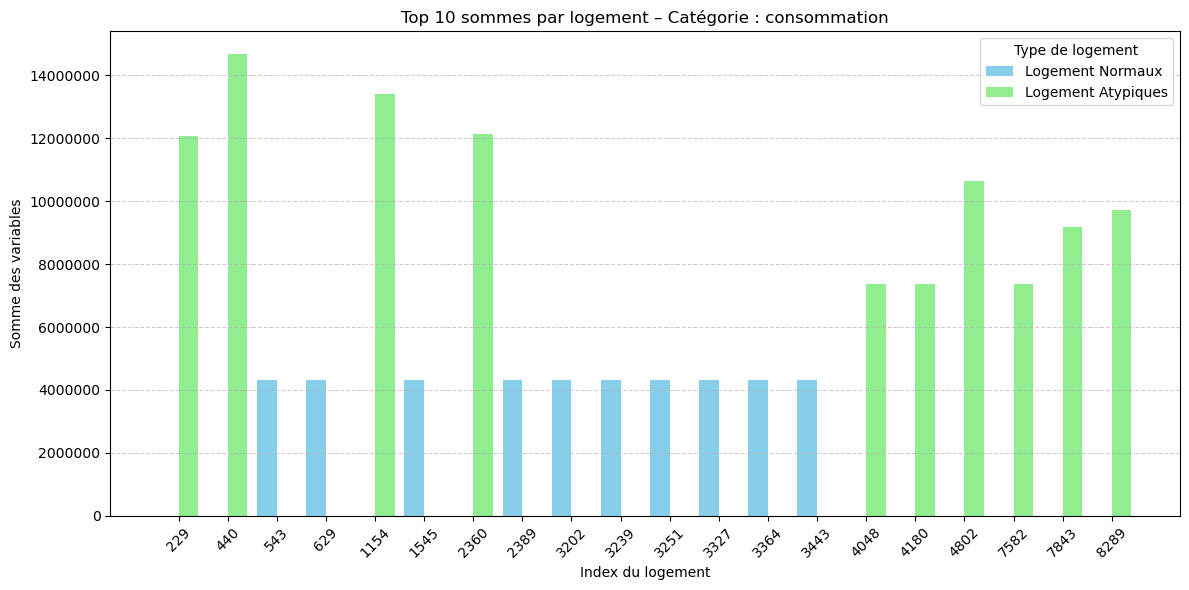

In [86]:
plot_top_comparaison('consommation',10)

<h2>7) Analyse en Composante Principale (ACP) Dernière partie </h2>

<hr>
<p><u>Dans la première partie, nous avons comparé deux analyses en composantes principales (ACP) :</u></p>
<ul>
    <li>Une première ACP réalisée avec les <code>données brutes</code>.</li>
    <li>Une seconde ACP effectuée à partir de <code>données synthétiques</code>.</li>
</ul>
<p>Nous avons constaté que les données synthétiques entraînaient une perte importante d'informations, tandis que l'ACP basée sur les données brutes conservait davantage d'informations. De plus, nous avons relevé la présence de nombreux <strong>outliers</strong>, lesquels perturbaient la projection sur les composantes principales et biaisaient la contribution des variables. Grâce à la classification par l’algorithme <strong>KMeans</strong>, ces outliers ont été identifiés lors de la dernière partie.</p>

<p>Dans cette section, notre objectif sera de réaliser une nouvelle ACP en excluant les outliers afin de comparer les résultats entre l’ACP sur les données brutes et celle sur les données épurées des outliers.</p>
<hr>

<h3 style="color:blue">7.1) Suppression des outliers</h3>

In [87]:
df_no_outliers = df_quanti.drop(logement_attypique.index, axis=0)
df_no_outliers.shape

(8647, 111)

<h3 style="color:blue">7.2) Normlisation des données sans outliers</h3>

In [88]:
df_no_outliers_norm = df_normalise(df_no_outliers)
df_no_outliers_norm = df_no_outliers_norm.drop(columns="clusters")

<h3 style="color:blue">7.3) Utilisation de notre fonction ACP sans outliers</h3>

In [89]:
val_no_out, vec_no_out, pro_no_out, nb_no_out_comp = acp(df_no_outliers_norm,1)

<h3 style="color:blue">7.4) Inertie totale & expliquée sans outliers</h3>

In [90]:
inertie_tot_no_out = sum(val_no_out)
inertie_tot_df = sum(val_pro_df)

print(f"L'inertie totale pour les données sans outliers est : {round(inertie_tot_no_out,0)}")
print(f"L'inertie totale pour les données brutes est : {round(inertie_tot_df,0)}")

L'inertie totale pour les données sans outliers est : 110.0
L'inertie totale pour les données brutes est : 110.0


<h3 style="color:blue">7.5) Comparaison de la projection des données sur les composantes principales</h3>

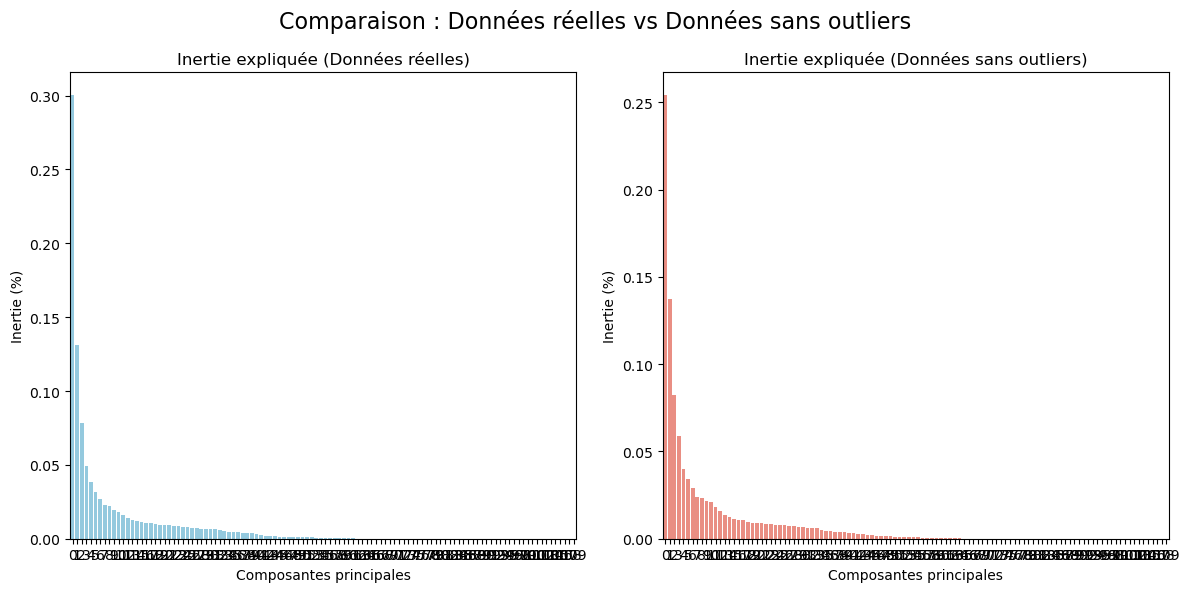

In [91]:
inertie_exp_df = val_pro_df/inertie_tot_df
inertie_exp_no_out = val_no_out/inertie_tot_no_out

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(inertie_exp_df, color="skyblue")
plt.xlabel("Composantes principales")
plt.ylabel("Inertie (%)")
plt.title("Inertie expliquée (Données réelles)")

plt.subplot(1,2,2)
sns.barplot(inertie_exp_no_out, color="salmon")
plt.xlabel("Composantes principales")
plt.ylabel("Inertie (%)")
plt.title("Inertie expliquée (Données sans outliers)")
plt.suptitle("Comparaison : Données réelles vs Données sans outliers", fontsize=16)
plt.tight_layout()
plt.show()

In [92]:
first_compo_df = inertie_exp_df[0] + inertie_exp_df[1]
first_compo_no_out = inertie_exp_no_out[0] + inertie_exp_no_out[1]

print(f"Les deux premières composantes pour les données de base expliquent : {round(first_compo_df*100,4)}% de la variabilité")
print(f"Les deux premières composantes pour les données sans outliers expliquent : {round(first_compo_no_out*100,4)}% de la variabilité")
print(f"Inertie perdu : {round((first_compo_df - first_compo_no_out)*100,2)}%")

Les deux premières composantes pour les données de base expliquent : 43.21% de la variabilité
Les deux premières composantes pour les données sans outliers expliquent : 39.1518% de la variabilité
Inertie perdu : 4.06%


<hr>
<p><u>Sans les outliers, l'inertie expliquée est moindre de 4.06%. Cette baisse pourrait être expliquée par :</u></p>
<ul>
    <li>La suppression des outliers, qui réduisent la variance totale disponible dans les données initiales.</li>
    <li>Un regroupement plus homogène des individus restants, entraînant une perte de diversité dans les projections.</li>
    <li>Une structure des données modifiée, avec une moindre contribution de certaines dimensions principales.</li>
</ul>
<hr>

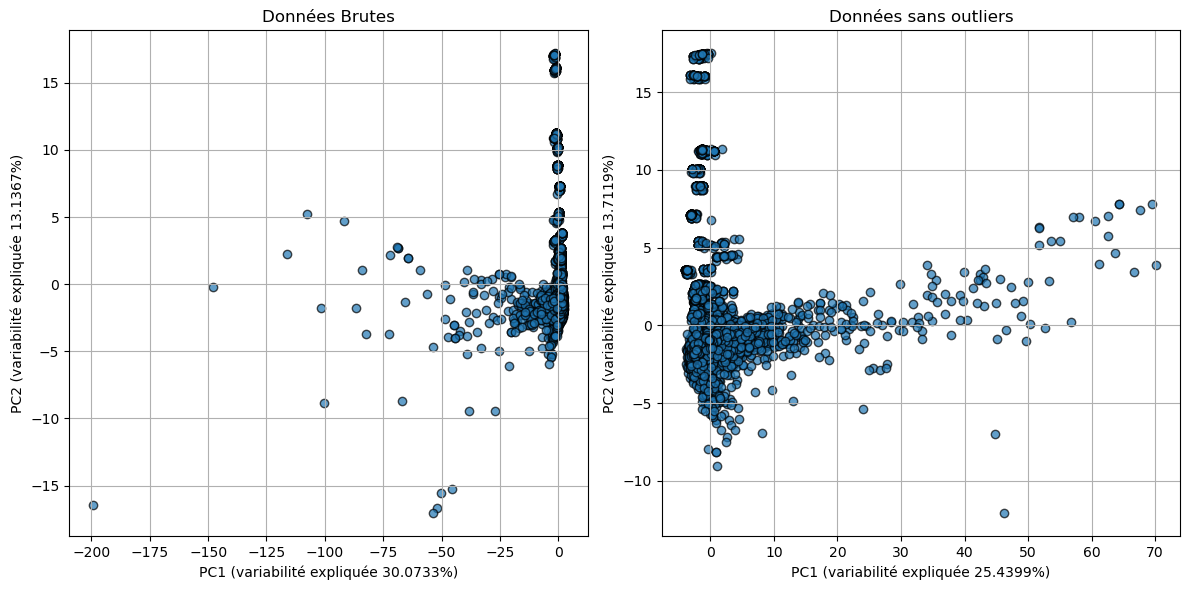

In [93]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_pro_df[:, 0], data_pro_df[:, 1], alpha=0.7, edgecolors="k")
plt.xlabel(f"PC1 (variabilité expliquée {round(inertie_exp_df[0] * 100, 4)}%)")
plt.ylabel(f"PC2 (variabilité expliquée {round(inertie_exp_df[1] * 100, 4)}%)")
plt.title("Données Brutes")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(pro_no_out[:, 0], pro_no_out[:, 1], alpha=0.7, edgecolors="k")
plt.xlabel(f"PC1 (variabilité expliquée {round(inertie_exp_no_out[0] * 100, 4)}%)")
plt.ylabel(f"PC2 (variabilité expliquée {round(inertie_exp_no_out[1] * 100, 4)}%)")
plt.title("Données sans outliers")
plt.grid(True)

plt.tight_layout()
plt.show()

<p><u>Voici la projection des données sur les composantes principales pour les données brutes et données sans outliers :</u></p>
<ul>
    <li>Données brutes : Répartition des données plus étendues en raison de la forte influence des outliers.</li>
    <li>Données sans outliers : Répartitions des données plus homogènes et linéaire et la pc2 à gagnée en variabilité.</li>
</ul>
<p>La projection des données sans outliers nous permet de visualiser une projection plus homogène et linéaire. Il serait plus facile de faire des clusterings avec ces données sans outliers.</p>

<h3 style="color:blue">7.6) Contribution des individus sans outliers</h3>

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\2286064773.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, patch_artist=True, labels=["Composante 1", "Composante 2"])


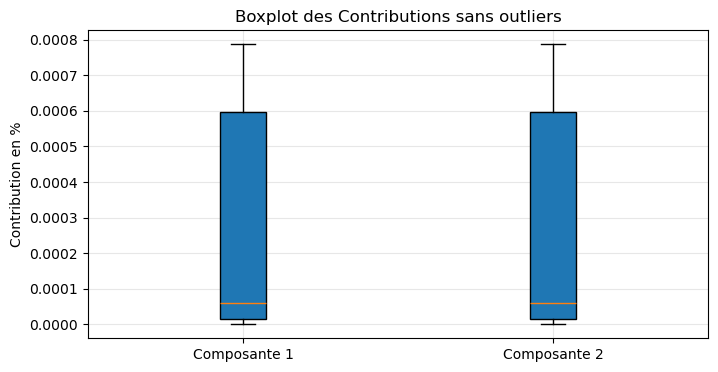

In [94]:
contrib_1_no_out, contrib_2_no_out = contribution(vec_no_out,val_no_out,0,1)
data = [contrib_1_no_out, contrib_1_no_out]

plt.figure(figsize=(8, 4))
plt.boxplot(data, vert=True, patch_artist=True, labels=["Composante 1", "Composante 2"])
plt.title("Boxplot des Contributions sans outliers")
plt.ylabel("Contribution en %")
plt.grid(alpha=0.3)

plt.ticklabel_format(style='plain', axis='y')
plt.show()

<p>Voici le boxplot des contributions sans outliers. On peut affirmer que la variabilité des contributions est très faible sans les outliers pour les deux composantes principales. Ainsi, aucun individu ne contribue davantage à la formation d'une composante par rapport à un autre, ce qui démontre une répartition homogène des contributions.</p>

<h3 style="color:blue">7.7) Qualité de représentation des individus sans outliers</h3>

C:\Users\rabah\AppData\Local\Temp\ipykernel_29236\1258611159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Composante", y="Qualité", data=qualite_long, palette="muted", inner="quartile")


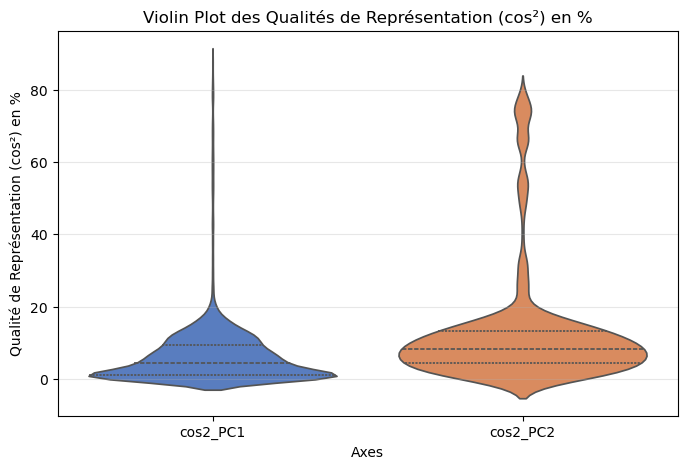

In [95]:
qualite_no_out = qualite(pro_no_out,0, 1)

qualite_long = pd.melt(qualite_no_out, var_name="Composante", value_name="Qualité")

plt.figure(figsize=(8, 5))
sns.violinplot(x="Composante", y="Qualité", data=qualite_long, palette="muted", inner="quartile")
plt.title("Violin Plot des Qualités de Représentation (cos²) en %")
plt.ylabel("Qualité de Représentation (cos²) en %")
plt.xlabel("Axes")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [96]:
qual1_moy_no_out = qualite_no_out['cos2_PC1'].mean()
qual2_moy_no_out = qualite_no_out['cos2_PC2'].mean()

print(f"La qualité moyenne pour les individus représentés sur la PC1 est : {round(qual1_moy_no_out,2)}%")
print(f"La qualité moyenne pour les individus représentés sur la PC2 est : {round(qual2_moy_no_out,2)}%")

La qualité moyenne pour les individus représentés sur la PC1 est : 6.57%
La qualité moyenne pour les individus représentés sur la PC2 est : 12.97%


Aucun changement notable avec la précédente observation sur les données brutes. Les individus sont mieux représentés sur la deuxième composantes que sur la première.

<h3 style="color:blue">7.8) Conclusion ACP dernière partie</h3>

<p>Cette analyse en composantes principales (ACP), réalisée sans les outliers, a clairement mis en évidence l'impact significatif de ces derniers sur la projection des données et les contributions aux composantes principales. En éliminant ces points atypiques, la projection est devenue plus homogène et linéaire, révélant une structure sous-jacente des données plus équilibrée et représentative.</p>

<p>De plus, les contributions aux deux composantes principales se sont également uniformisées, soulignant que chaque individu participe désormais de manière équivalente à la formation des axes principaux. Cela renforce l'idée que la suppression des outliers permet non seulement de réduire les biais dans l'interprétation des résultats, mais aussi d'obtenir une vision plus claire et fiable des relations entre les données.</p>


<h2>8) Commentaire sur les étiquettes DPE </h2>

<hr>
<p>Dans cette dernière partie, nous allons nous concentrer sur l'évaluation des étiquettes DPE (Diagnostic de Performance Énergétique) et ECS (Énergie de Chauffe Sanitaire) attribuées aux données. L'objectif sera de vérifier si ces étiquettes ont été correctement attribuées en fonction des caractéristiques des données et des critères établis.</p>

<p>En analysant ces classifications, nous chercherons à identifier d'éventuelles incohérences ou erreurs, ce qui nous permettra de valider ou de remettre en question la pertinence des étiquettes appliquées. Cette étape est cruciale pour garantir la fiabilité des résultats et la qualité des analyses futures.</p>
<hr>

<p>Ici on concatène notre Dataframe <code>df_quanti</code> avec notre DataFrame <code>qualitative</code> afin de pouvoir récupérer les étiquettes et différentes informations permettant de commenter ces étiquettes.</p>

In [ ]:
qualitative.columns

<h3 style="color:blue">8.1) Concatenation des DataFrames</h3>

In [97]:
df_combined = pd.concat([df_quanti,qualitative], axis=1)
df_combined.isna().sum()

Appartement_non_visité_(0/1)          0
Année_construction                    0
Hauteur_sous-plafond                  0
Nombre_appartement                    0
Nombre_niveau_immeuble                0
                                   ... 
Description_générateur_ECS_n°1      107
Type_énergie_générateur_ECS_n°1      15
Type_générateur_ECS_n°1              15
Usage_générateur_ECS_n°1             15
Catégorie_ENR                      6296
Length: 176, dtype: int64

<p>On remplace toutes les données qualitatives au lieu de les remplacer par autre choses comme la valeur précédente avec un <code>bfill</code> ou la valeur suivante avec un <code>ffill</code> car il possible que les données non renseignées font que les étiquettes sont faussées.</p>

<h3 style="color:blue">8.2) fillna avec "Inconnu"</h3>

In [98]:
df_combined.fillna('Inconnu', inplace=True)

In [99]:
df_combined.isna().sum()

Appartement_non_visité_(0/1)       0
Année_construction                 0
Hauteur_sous-plafond               0
Nombre_appartement                 0
Nombre_niveau_immeuble             0
                                  ..
Description_générateur_ECS_n°1     0
Type_énergie_générateur_ECS_n°1    0
Type_générateur_ECS_n°1            0
Usage_générateur_ECS_n°1           0
Catégorie_ENR                      0
Length: 176, dtype: int64

<h3 style="color:blue">8.3) Réparition des étiquettes</h3>

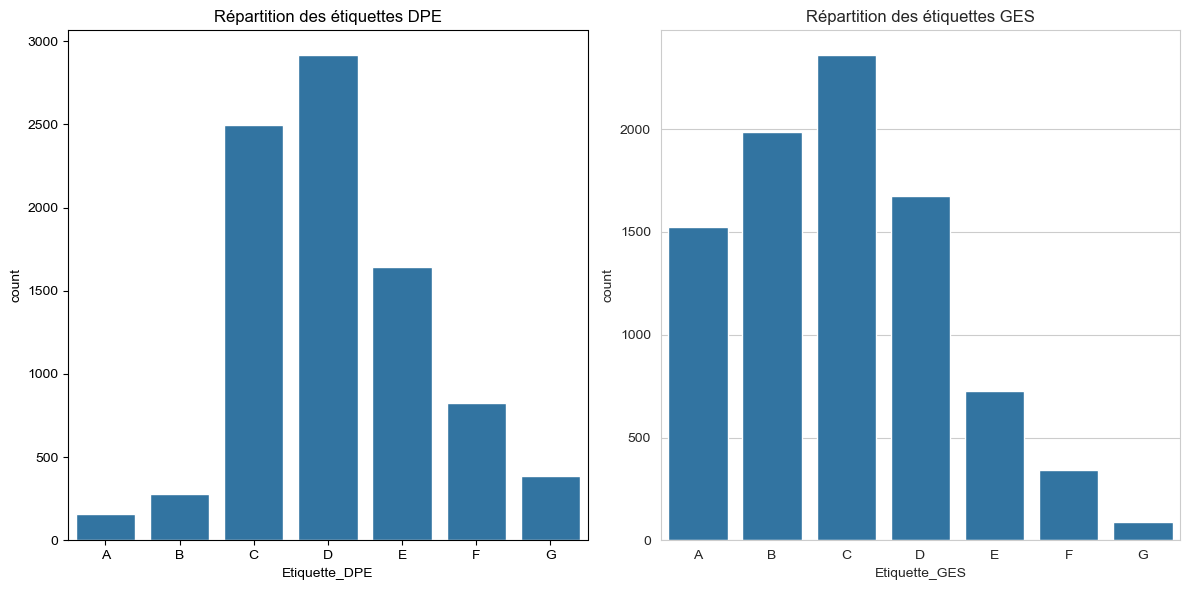

In [100]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1) 
sns.set_style("whitegrid")
sns.countplot(
    x="Etiquette_DPE",
    data=df_combined,
    order=["A", "B", "C", "D", "E", "F", "G"]
)
plt.title("Répartition des étiquettes DPE")

plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.countplot(
    x="Etiquette_GES",
    data=df_combined,
    order=["A", "B", "C", "D", "E", "F", "G"]
)
plt.title("Répartition des étiquettes GES")

plt.tight_layout()
plt.show()

<h3 style="color:blue">8.4) Comparaisons des étiquettes avec des GroupBy</h3>

<p>Nous allons comparer les différentes consommations des logements normaux et attypiques par <code>Etiquettes DPE</code> et <code>Etiquette_GES</code> afin de voir si on peut distinguer des logements qui devraient avoir une étiquette plus élevé ou pas.</p>

<p><u>Pour cela, nous allons créer deux variables : </u></p>

<ul>
    <li><code>df_combined_no_out</code></li>
    <li><code>df_combined_outliers</code></li>
</ul>

<p>Ces deux variables correspondent au filtrage fait en fonction des logements normaux et attypiques sur le DataFrame combiné avec les variables qualitatives pour pourvoir faire le <code>groupby</code> par <code>Etiquette_DPE</code>.</p>

In [110]:
df_combined_no_out = df_combined[df_combined["clusters"]==0]
df_combined_outliers = df_combined[df_combined["clusters"]==1]

In [106]:
df_combined_no_out[["Etiquette_DPE"] + conso_list].groupby(["Etiquette_DPE"]).mean()

,Conso_ECS_é_finale,Conso_chauffage_dépensier_installation_chauffage_n°1,Conso_5_usages_é_primaire,Conso_chauffage_dépensier_é_primaire,Conso_éclairage_é_finale,Conso_éclairage_é_primaire,Conso_chauffage_é_finale_énergie_n°1,Conso_chauffage_installation_chauffage_n°1,Conso_chauffage_générateur_n°1_installation_n°1,Conso_ECS_é_primaire,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Conso_ECS_dépensier_é_finale,Conso_chauffage_dépensier_é_finale,Conso_chauffage_é_finale,Conso_chauffage_é_primaire,Conso_ECS_é_finale_énergie_n°1,Conso_ECS_dépensier_é_primaire,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale
Etiquette_DPE,,,,,,,,,,,,,,,,,,,
A,680.463057,2330.694268,6709.175796,4277.041401,216.885987,498.833758,1736.475159,1755.640764,1714.940764,1511.319745,2277.187898,957.705096,2512.260510,1891.903822,3953.850318,665.035669,1657.935669,2892.869427,3113.243312
B,1774.699275,16819.244565,9285.310145,5442.309420,193.514493,445.076449,3135.439855,13099.122826,12914.165217,2677.640580,16581.676087,2432.587681,4415.338043,3409.869928,5136.059783,1691.515217,2827.791667,5153.863043,5824.402536
C,2198.352718,57200.037294,10912.160290,6658.823157,154.982400,356.457793,4754.501571,44917.221627,42072.131736,3137.008578,53556.092831,2919.857551,6385.824768,5023.766975,6342.035965,2122.050060,3323.271164,7050.943294,7845.211841
D,2469.041235,104830.466805,16272.713492,11866.480435,150.824707,346.891511,8436.834817,82834.556177,77483.787578,3692.971256,98039.890442,3268.943720,11224.236784,8951.901484,11314.056867,2145.965148,3892.387543,10759.758040,11971.239717
E,2424.892025,21145.362515,22259.262209,17791.961718,146.901227,337.866626,11952.692331,17019.462086,16434.910000,4071.867607,20420.865644,3169.878160,15734.689448,12723.233804,17020.763313,2109.730552,4299.020859,14237.417853,15655.357975
F,2614.805630,114336.229253,28722.851408,24160.917748,148.771603,342.174541,16784.003060,93446.950428,92687.587515,4521.580661,113405.232681,3400.309670,21842.041248,17828.891432,23179.868299,2089.848103,4741.811383,18968.304284,20887.784333
G,2512.515544,22695.491710,36734.624093,32227.479534,136.765285,314.555959,19474.120207,18654.683420,17647.396632,4765.074870,21473.973575,3232.703627,25686.136269,21109.991969,31056.241192,2100.370207,5001.207513,21714.592487,24019.598705


In [111]:
df_combined_outliers[["Etiquette_DPE"] + conso_list].groupby(["Etiquette_DPE"]).mean()

,Conso_ECS_é_finale,Conso_chauffage_dépensier_installation_chauffage_n°1,Conso_5_usages_é_primaire,Conso_chauffage_dépensier_é_primaire,Conso_éclairage_é_finale,Conso_éclairage_é_primaire,Conso_chauffage_é_finale_énergie_n°1,Conso_chauffage_installation_chauffage_n°1,Conso_chauffage_générateur_n°1_installation_n°1,Conso_ECS_é_primaire,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Conso_ECS_dépensier_é_finale,Conso_chauffage_dépensier_é_finale,Conso_chauffage_é_finale,Conso_chauffage_é_primaire,Conso_ECS_é_finale_énergie_n°1,Conso_ECS_dépensier_é_primaire,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale
Etiquette_DPE,,,,,,,,,,,,,,,,,,,
B,114483.700000,107331.800000,294004.700000,127314.300000,7336.300000,16873.500000,127314.300000,83458.550000,83458.550000,114483.700000,107331.800000,158657.950000,170445.650000,127314.300000,127314.300000,114483.700000,114483.700000,241798.000000,264496.600000
C,115755.200000,224130.053846,393203.292308,230438.430769,5724.423077,13166.169231,214368.300000,174836.453846,169393.961538,120016.007692,216324.146154,161806.138462,273785.169231,215130.592308,216121.576923,112477.653846,129600.184615,326845.961538,355696.969231
D,104589.376190,321265.619048,578007.319048,398757.480952,5706.090476,13124.004762,368677.133333,254404.204762,245874.419048,125466.928571,310397.995238,142705.066667,466500.485714,369076.295238,394414.876190,87408.957143,127221.328571,458758.657143,498937.647619
E,69362.533333,146053.091667,526529.650000,416175.016667,3680.975000,8466.216667,245279.158333,117435.641667,117435.641667,112337.658333,146053.091667,93749.500000,349136.975000,280544.516667,388344.925000,60334.141667,130461.291667,311713.241667,361144.891667
F,124626.466667,424866.683333,883490.500000,691129.833333,4983.333333,11461.633333,450065.283333,340908.966667,340908.966667,200250.800000,424866.683333,165992.050000,577717.183333,463263.950000,648196.900000,101892.983333,214766.733333,561605.216667,603126.433333
G,26813.500000,22971.600000,543173.600000,498345.700000,2387.900000,5492.200000,498345.700000,19186.300000,19186.300000,26813.500000,22971.600000,36124.300000,596659.800000,498345.700000,498345.700000,26813.500000,26813.500000,525159.200000,532991.500000


<hr>
<p>En comparant les différents type de consommations, notamment <code>Conso_5_usages_é_primaire</code> dans notre cas car c'est une des variables qui permet de donner une étiquette en fonction de la consommation car on constate que le classement des étiquettes est fait dans l'ordre croissant. On remarque que l'étiquette G des logements normaux à une plus petite consommation d'usages primaire que l'étiquette A des logements attypiques, pour rappel les étiquettes DPE sont classées de A pour <b>"logement économe"</b> et G pour <b>"logement energivore"</b>. Or, l'étiquette G pour les logement normaux vaut en moyenne <code>36734.624093</code> et la moyenne pour l'étiquette A pour les logement attypiques est de <code>294004.700000</code>. Cette moyenne est 8 fois plus grande mais à une étiquette DPE <code>A</code> ce qui est très étrange.</p>
<hr>

In [112]:
df_combined_no_out[["Etiquette_GES"] + conso_list].groupby(["Etiquette_GES"]).mean()

,Conso_ECS_é_finale,Conso_chauffage_dépensier_installation_chauffage_n°1,Conso_5_usages_é_primaire,Conso_chauffage_dépensier_é_primaire,Conso_éclairage_é_finale,Conso_éclairage_é_primaire,Conso_chauffage_é_finale_énergie_n°1,Conso_chauffage_installation_chauffage_n°1,Conso_chauffage_générateur_n°1_installation_n°1,Conso_ECS_é_primaire,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Conso_ECS_dépensier_é_finale,Conso_chauffage_dépensier_é_finale,Conso_chauffage_é_finale,Conso_chauffage_é_primaire,Conso_ECS_é_finale_énergie_n°1,Conso_ECS_dépensier_é_primaire,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale
Etiquette_GES,,,,,,,,,,,,,,,,,,,
A,1762.164234,21858.398093,11354.845299,6718.303682,158.399474,364.318409,2968.376068,17231.088757,17032.474753,3820.082314,21605.940894,2285.380802,4215.043853,3282.972781,6307.519395,1713.885470,4071.455424,5127.832873,5578.722025
B,1994.805909,14220.963232,17507.241616,12827.747020,137.618990,316.519848,5556.286212,11325.663687,10893.872576,4324.194646,13680.250051,2582.783131,7660.540606,6081.745000,12155.694293,1888.949394,4587.302929,7811.093333,8523.225960
C,2446.210051,79699.836270,16783.987896,12534.758768,155.055475,356.622455,7923.627032,62862.243499,59684.143713,3371.710180,75641.550257,3271.471129,10555.428229,8448.921985,12049.133618,2286.728956,3533.062789,10297.814457,11487.801711
D,2775.988320,134529.671343,17464.495786,13452.446177,157.645033,362.577182,11584.075677,106167.335099,97035.549007,3168.727273,122941.226249,3710.210777,15422.488983,12381.362553,12905.740458,2203.937568,3323.419988,13788.546839,15761.709151
E,2711.344444,139472.280972,23630.510417,19707.543611,155.419861,357.462222,18048.838889,113632.197222,112957.490694,3410.806389,138641.746667,3564.227778,23077.790972,18760.174028,18925.185278,2145.402917,3596.025139,20164.348889,22034.354028
F,3235.096460,36717.109145,33378.023009,29178.212389,175.868142,404.496755,26736.487906,30060.135693,29198.515044,3874.208260,35667.573746,4251.676991,33890.548968,27806.636283,28080.751032,2732.496460,4048.433333,29352.682596,31660.456932
G,2956.287500,38764.109091,37322.377273,33267.751136,157.480682,362.196591,31409.571591,31918.762500,31269.381818,3984.332955,37980.277273,3739.093182,38920.867045,32048.348864,32140.861364,2173.603409,4169.498864,33391.936364,35525.155682


In [113]:
df_combined_outliers[["Etiquette_GES"] + conso_list].groupby(["Etiquette_GES"]).mean()

,Conso_ECS_é_finale,Conso_chauffage_dépensier_installation_chauffage_n°1,Conso_5_usages_é_primaire,Conso_chauffage_dépensier_é_primaire,Conso_éclairage_é_finale,Conso_éclairage_é_primaire,Conso_chauffage_é_finale_énergie_n°1,Conso_chauffage_installation_chauffage_n°1,Conso_chauffage_générateur_n°1_installation_n°1,Conso_ECS_é_primaire,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Conso_ECS_dépensier_é_finale,Conso_chauffage_dépensier_é_finale,Conso_chauffage_é_finale,Conso_chauffage_é_primaire,Conso_ECS_é_finale_énergie_n°1,Conso_ECS_dépensier_é_primaire,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale
Etiquette_GES,,,,,,,,,,,,,,,,,,,
A,135819.975000,280809.100000,537672.650000,302192.100000,7278.950000,16741.575000,256027.900000,221336.075000,221336.075000,160951.200000,280809.100000,189397.625000,325776.325000,256027.900000,302192.100000,135819.975000,160951.200000,398518.825000,424251.950000
B,105887.080000,8673.820000,587436.360000,352814.240000,5768.780000,13268.180000,150599.040000,6760.300000,6760.300000,220297.560000,8673.820000,139055.620000,195466.200000,150599.040000,323186.280000,105887.080000,251889.320000,270105.280000,275595.940000
C,90736.866667,238475.050000,502530.625000,363289.841667,4942.416667,11367.537500,244726.933333,187388.366667,184440.350000,110214.562500,234246.850000,125880.904167,336097.095833,266072.187500,344809.912500,83816.125000,119113.004167,332394.125000,377463.904167
D,101207.526667,311216.146667,545854.846667,398751.440000,5317.980000,12231.366667,381813.280000,247810.866667,235869.166667,112247.340000,296001.473333,137694.106667,480847.260000,382372.106667,383098.586667,77154.940000,117061.453333,458968.206667,505540.033333
E,89545.925000,305462.975000,643943.775000,485399.350000,4021.375000,9249.100000,485399.350000,248825.775000,248825.775000,128952.775000,305462.975000,119141.675000,599102.825000,485399.350000,485399.350000,59232.950000,128952.775000,544632.300000,587811.200000
F,136795.966667,473213.433333,696024.366667,549598.466667,4314.900000,9924.300000,535457.933333,375738.133333,375738.133333,136795.966667,473213.433333,186228.033333,664442.833333,535457.933333,535457.933333,136795.966667,144223.566667,672253.900000,682588.900000


<hr>
<p>Même constat que pour les étiquettes DPE. Si on se base sur les consommations il y a quelque chose de bizarre, <b>peut être qu'une autre variable influence fortement la classification des étiquettes ?</b></p>
<hr>

<h3 style="color:blue">8.4) Comparaisons des logements normaux des logements attypiques en fonction des méthode d'application du DPE</h3>

In [114]:
df_combined_no_out["Méthode_application_DPE"].unique()

array(['dpe maison individuelle',
       'dpe appartement généré à partir des données DPE immeuble',
       'dpe appartement individuel', 'dpe immeuble collectif'],
      dtype=object)

In [115]:
df_combined_no_out["Méthode_application_DPE"].value_counts()

Méthode_application_DPE
dpe appartement individuel                                  3791
dpe maison individuelle                                     2656
dpe appartement généré à partir des données DPE immeuble    1996
dpe immeuble collectif                                       204
Name: count, dtype: int64

In [116]:
df_combined_outliers["Méthode_application_DPE"].value_counts()

Méthode_application_DPE
dpe immeuble collectif    55
Name: count, dtype: int64

<p>Découverte très intéressante : tous les outliers sont des immeubles collectifs. Maintenant on va essayer de comprendre pourquoi les consommations de ces immeubles sont si importantes.</p>

Monsieur Hébert m'a donné une idée à exploiter avec cette colonne <code>df_combined["Nombre_appartement"]</code>. To be continued

<p>Dans un premier temps, il serait intéressant de voir en moyenne le nombre d'appartements dont est responsable un bâtiment. Pour les outliers et les batîments normaux.</p>

In [138]:
sum(df_combined_outliers["Nombre_appartement"])/len(df_combined_outliers)

53.30909090909091

<p>55 bâtiments (ou immeubles collectifs) sont responsables de 2932 logements individuels. Cela donne une moyenne de 53 appartements par bâtiment.</p>

In [139]:
sum(df_combined_no_out["Nombre_appartement"])/len(df_combined_no_out)

21.427808328979953

<p>8647 bâtiments (ou immeubles collectifs) sont responsables de 185286 logements individuels. Cela donne une moyenne de 21 appartements par bâtiment.</p>

In [143]:
df_combined_outliers[["Configuration_installation_chauffage_n°1","Configuration_installation_chauffage_n°2","Configuration_installation_ECS"]].head()

,Configuration_installation_chauffage_n°1,Configuration_installation_chauffage_n°2,Configuration_installation_ECS
52,Installation de chauffage simple,Inconnu,Un seul système d'ECS sans solaire
82,Installation de chauffage simple,Installation de chauffage simple,Un seul système d'ECS sans solaire
229,Installation de chauffage simple,Inconnu,Un seul système d'ECS sans solaire
440,Installation de chauffage simple,Inconnu,Un seul système d'ECS sans solaire
940,Installation de chauffage simple,Installation de chauffage simple,Un seul système d'ECS sans solaire


In [146]:
df_combined_outliers["Année_construction"].mean()

np.float64(1969.4003350006883)

<p>On peut déjà noter que les batîments attypiques sont en moyenne responsable de deux fois plus de logements individuels que les batîments normaux. Mais une autre observation a retenu mon attention : chaque bâtiment atypique ne possède qu'une installation de chauffage simple pour les configurations d'installations de chauffage n°1 et n°2 et ils ne possèdent qu'une seule configuration d'installation ECS qui est un seul système d'ECS sans solaire.</p>

**Autrement dit**, cette configuration a un fort impact environnemental et est très polluante pour plusieurs raisons :

1. **Chauffage simple sans régulation fine** :
   Les bâtiments atypiques utilisent un chauffage centralisé simple, ce qui entraîne une distribution uniforme de la chaleur sans tenir compte des besoins réels de chaque appartement. Cela génère des pertes de chaleur et une consommation excessive d’énergie, augmentant ainsi les émissions de CO₂.

2. **Absence de système solaire pour l'ECS** :
   L’absence de panneaux solaires pour préchauffer l'eau signifie que la production d'eau chaude sanitaire repose uniquement sur des sources d'énergie non renouvelables, comme le gaz ou l'électricité. Cela entraîne une consommation plus élevée d'énergie fossile, ce qui augmente les émissions de gaz à effet de serre (GES) et contribue au réchauffement climatique.

3. **Surconsommation énergétique** :
   L'absence d'optimisation (pas de régulation, pas de dimensionnement adapté) augmente la consommation d’énergie au-delà de ce qui est nécessaire. Cela engendre non seulement des coûts élevés, mais aussi une pollution accrue, car une partie de cette énergie provient encore de sources fossiles.

4. **Âge des bâtiments** :
   De plus, la date moyenne de création des logements de ces bâtiments date de **1969**. Cela signifie que la **performance énergétique** des bâtiments est probablement **dégradée** par rapport aux standards actuels, et que les systèmes de chauffage et d'ECS sont **obsolètes**, ce qui aggrave encore leur **inefficacité** énergétique et leur **impact environnemental**.

**Conclusion** :
En résumé, cette configuration (chauffage centralisé simple et ECS sans solaire), combinée à l'âge moyen des bâtiments, est hautement polluante. Elle repose sur des sources d'énergie fossiles, génère une consommation excessive et a un impact environnemental significatif, contribuant au réchauffement climatique.


<h2>9) Conclusion Finale</h2>

**Même si nous n'avons pas pu aller jusqu'au bout de nos analyses et de notre quête pour comprendre la cause exacte de la consommation excessivement grande de certains logements, nous avons tout de même quelques pistes :**

- La configuration des bâtiments atypiques, avec un chauffage centralisé simple et un système ECS sans énergie solaire, semble être un facteur clé de surconsommation énergétique. Ces installations, combinées à un âge moyen de construction datant de 1969, génèrent une consommation excessive d’énergie et un impact environnemental important.
- L'absence de régulation fine et d’optimisation des installations dans ces bâtiments contribue à une gestion inefficace de l’énergie, ce qui augmente les coûts et les émissions de gaz à effet de serre.

En conclusion, la méthode d’application DPE pour ces 55 logements atypiques est celle de **"DPE immeuble collectif"**. Cette approche, qui regroupe plusieurs logements sous une même configuration énergétique, met en évidence la nécessité de réévaluer et d'optimiser ces installations pour réduire la consommation énergétique et améliorer l'efficacité environnementale.
